<html>
<body>
<h1 style="text-align:center; font-family: 'Arial', sans-serif; font-weight:bold; color:white; background-color:#2AAC92
 ;padding:20px">
  Lung Cancer Risk & Prediction ML Project
</h1>

</body>
</html>

* Created Dataset Reference :  `https://www.kaggle.com/datasets/ankushpanday1/lung-cancer-risk-and-prediction-dataset`
- Because Original Dataset Had Problems So I Had To Create  One

<hr style="border: 2px solid #2AAC92; width: 80%;">
<h1 style="text-align:center; font-family: 'Arial', sans-serif; color : white;">
1- Lung Cancer Risk & Prediction – Full Description
</h1>
<hr style="border: 2px solid #2AAC92; width: 80%;">



## 1. Dataset Overview

| Property | Description |
|--------|------------|
| Domain | Healthcare  |
| Dataset Type | Structured Tabular Data (.csv)|
| Primary Task | This dataset helps understand and predict lung cancer risks based on health, environment, and lifestyle factors. It includes details about smoking habits, pollution exposure, healthcare access, and survival chances |
| Target Variable | Final_Prediction |
| Total Features | 25 |
| Data Types | Numerical + [Nominal + Binary + Ordinal]=>Categorical|

---

## 2. Feature Schema

| # | Column Name | Data Type | Description |
|--|------------|----------|------------|
| 1 | Country | Nominal | Patient country of residence |
| 2 | Age | Numerical | Age of patient (years) |
| 3 | Gender | Binary | Male / Female |
| 4 | Smoking_Status | Nominal | Non-Smoker / Former Smoker / Current Smoker |
| 5 | Second_Hand_Smoke | Binary | Exposure to second-hand smoke |
| 6 | Air_Pollution | Ordinal | Low / Medium / High |
| 7 | Occupational_Exposure | Binary | Exposure to workplace hazards |
| 8 | Rural_or_Urban | Binary | Living area classification |
| 9 | Socioeconomic_Status | Ordinal | Low / Middle / High |
| 10 | Healthcare_Access | Ordinal | Poor / Limited / Good |
| 11 | Insurance | Binary | Health insurance availability |
| 12 | Screening | Binary | Cancer screening performed |
| 13 | Stage_at_Diagnosis | Ordinal | Cancer stage (I–IV) |
| 14 | Cancer_Type | Binary |None / NSCLC / SCLC ->`سرطان الرئة ذو الخلايا غير الصغيرة / سرطان الرئة ذو الخلايا الصغيرة`|
| 15 | Mutation_Type | Nominal | EGFR / ALK / None / KRAS|
| 16 | Treatment | Ordinal | None / Partial / Full |
| 17 | Clinical_Trial | Binary | Participation in clinical trials |
| 18 | Language_Barrier | Binary | Communication barrier exists |
| 19 | Mortality_Risk | Numerical | Predicted mortality probability |
| 20 | 5_Year_Survival | Numerical | Probability of 5-year survival |
| 21 | Delay_in_Diagnosis | Binary | Delay before diagnosis |
| 22 | Family_History | Binary | Family cancer history |
| 23 | Indoor_Smoking | Binary | Smoking inside household |
| 24 | Tobacco_Use | Binary | Active tobacco consumption |
| 25 | Final_Prediction | Binary | Model outcome (Yes / No) |

---

## 3. Numerical Features Summary

| Feature | Meaning | Range |
|------|--------|------|
| Age | Patient age | 0 – 100 |
| Mortality_Risk | Death probability | 0.0 – 1.0 |
| 5_Year_Survival | Survival probability | 0.0 – 1.0 |

---

## 4. Categorical Feature Domains

### Smoking Status
| Value | Meaning |
|----|-------|
| Non-Smoker | Never smoked |
| Former Smoker | Quit smoking |
| Current Smoker | Active smoker |

### Cancer Stage
| Stage | Description |
|----|------------|
| I | Localized |
| II | Early regional spread |
| III | Advanced regional |
| IV | Metastatic |

### Treatment Level
| Value | Description |
|----|-------------|
| None | No treatment |
| Partial | Incomplete treatment |
| Full | Complete treatment |

---

## 5. Binary Features

| Feature | Yes | No |
|------|-----|----|
| Second_Hand_Smoke | Exposed | Not exposed |
| Occupational_Exposure | Present | Absent |
| Insurance | Covered | Not covered |
| Screening | Performed | Not performed |
| Clinical_Trial | Participated | Not participated |
| Language_Barrier | Exists | None |
| Delay_in_Diagnosis | Delayed | Timely |
| Family_History | Positive | Negative |
| Indoor_Smoking | Yes | No |
| Tobacco_Use | User | Non-user |

---

## 6. Target Variable

| Column | Meaning |
|------|--------|
| Final_Prediction | High-risk mortality outcome prediction |

---

## 7. Use Cases

- Survival prediction modeling
- Lung cancer risk analysis
- Healthcare accessibility impact studies
- Treatment effectiveness evaluation
- Public health decision support

---

## 8. Notes

- Dataset contains mixed feature types.
- Requires cleaning & encoding before ML training.
- Suitable for classification and risk scoring models.


<hr style="border: 2px solid #2AAC92; width: 80%;">
<h1 style="text-align:center; font-family: 'Arial', sans-serif; color : white;">
2 - Datset Creation
</h1>
<hr style="border: 2px solid #2AAC92; width: 80%;">

In [98]:
import pandas as pd
import numpy as np

# -----------------------------
# Configuration
# -----------------------------
n = 40000 # rows number
np.random.seed(42) # like(random state)

# -----------------------------
# Feature Domains
# -----------------------------
countries = ["Russia", "Thailand", "Colombia", "Egypt", "DR Congo", "USA", "India", "Brazil", "China", "Mexico"]
genders = ["Male", "Female"]
smoking_status = ["Non-Smoker", "Former Smoker", "Current Smoker"]
yes_no = ["Yes", "No"]
air_pollution = ["Low", "Medium", "High"]
socio_status = ["Low", "Middle", "High"]
healthcare_access = ["Poor", "Limited", "Good"]
stage = ["I", "II", "III", "IV"]
cancer_type = ["None", "NSCLC", "SCLC"]
mutation_type = ["EGFR", "ALK", "KRAS", "None"]
treatment_type = ["None", "Partial", "Full"]

# -----------------------------
# existance of features in dataset and probabilities
# -----------------------------
data = pd.DataFrame({ # we used dataframes because sklearn work on it
    "Country": np.random.choice(countries, n),
    "Age": np.random.randint(30, 91, n),
    "Gender": np.random.choice(genders, n),
    "Smoking_Status": np.random.choice(smoking_status, n, p=[0.4, 0.35, 0.25]),# dum of probabilities must be =1
    "Second_Hand_Smoke": np.random.choice(yes_no, n, p=[0.3, 0.7]),
    "Air_Pollution": np.random.choice(air_pollution, n, p=[0.3, 0.5, 0.2]),
    "Occupational_Exposure": np.random.choice(yes_no, n, p=[0.2, 0.8]),
    "Rural_or_Urban": np.random.choice(["Rural", "Urban"], n, p=[0.4, 0.6]),
    "Socioeconomic_Status": np.random.choice(socio_status, n, p=[0.3, 0.5, 0.2]),
    "Healthcare_Access": np.random.choice(healthcare_access, n, p=[0.2, 0.4, 0.4]),
    "Insurance": np.random.choice(yes_no, n, p=[0.45, 0.55]),
    "Language_Barrier": np.random.choice(yes_no, n, p=[0.1, 0.9]),
    "Indoor_Smoking": np.random.choice(yes_no, n, p=[0.15, 0.85]),
    "Tobacco_Use": np.random.choice(yes_no, n, p=[0.4, 0.6]),
    "Family_History": np.random.choice(yes_no, n, p=[0.4, 0.6])
})

# -----------------------------
# Derived dependencies
# -----------------------------
# Screening(cancer_screeing) affected by age, insurance, healthcare, language barrier
data["Screening"] = np.where(
    (data["Age"] < 65) & #bitwise (and gate)
    (data["Insurance"] == "Yes") &
    (data["Healthcare_Access"] != "Poor") &
    (data["Language_Barrier"] == "No"), "Yes", "No"
)

#  Stage effected by screening and healthcare
def assign_stage(row):
    if row["Screening"] == "Yes":
        return np.random.choice(stage, p=[0.45, 0.35, 0.15, 0.05])
    elif row["Healthcare_Access"] == "Poor":
        return np.random.choice(stage, p=[0.1, 0.2, 0.35, 0.35]) # chose between 4 value and apply probabilities on choice
    else:
        return np.random.choice(stage, p=[0.25, 0.3, 0.3, 0.15])
data["Stage_at_Diagnosis"] = data.apply(assign_stage, axis=1) # used to apply function on column stage_at_diagones

# Cancer risk score from multiple factors (add weights for each realistic that would effect on predicition)
risk_score = (
    (data["Age"]/90)*0.15 +
    data["Smoking_Status"].map({"Non-Smoker":0, "Former Smoker":0.3, "Current Smoker":0.6}) * 0.25 +
    data["Second_Hand_Smoke"].map({"No":0, "Yes":0.2}) * 0.11 +
    data["Air_Pollution"].map({"Low":0, "Medium":0.2, "High":0.35}) * 0.2 +
    data["Occupational_Exposure"].map({"No":0, "Yes":0.2}) * 0.2 +
    data["Indoor_Smoking"].map({"No":0, "Yes":0.15}) * 0.11 +
    data["Family_History"].map({"No":0, "Yes":0.25}) * 0.15
)

# Add tiny noise
risk_score += np.random.normal(0,0.02,size=n) # take random row samples using normal distibution

# Cancer type based on risk and exposure

data["Cancer_Type"] = np.where( # apply condition and then choice based on probability
    risk_score > 0.3,
    np.random.choice(["NSCLC","SCLC"], n, p=[0.6,0.4]),
    "None"
)

# Mutation depends on Cancer_Type and Smoking_Status
def assign_mutation(row):
    if row["Cancer_Type"] == "NSCLC":
        if row["Smoking_Status"] == "Current Smoker":
            return np.random.choice(["KRAS","EGFR","ALK","None"], p=[0.4,0.3,0.2,0.1])
        else:
            return np.random.choice(["EGFR","ALK","KRAS","None"], p=[0.35,0.15,0.1,0.4])
    return "None"
data["Mutation_Type"] = data.apply(assign_mutation, axis=1) # apply function on data set

# Treatment access depends on stage and healthcare
def assign_treatment(row):
    if row["Cancer_Type"] == "None":
        return "None"
    if row["Healthcare_Access"] == "Good":
        return np.random.choice(["Full","Partial"], p=[0.7,0.3])
    if row["Healthcare_Access"] == "Limited":
        return np.random.choice(["Partial","None"], p=[0.7,0.3])
    return np.random.choice(["Partial","None"], p=[0.5,0.5]) # in 'medium' case
data["Treatment"] = data.apply(assign_treatment, axis=1)

# Clinical trial access based on stage and healthcare
data["Clinical_Trial"] = np.where(
    (data["Healthcare_Access"]=="Good") & (data["Stage_at_Diagnosis"].isin(["III","IV"])),
    "Yes","No"
)

# Delay in diagnosis depends on language barrier and poor access
data["Delay_in_Diagnosis"] = np.where(
    (data["Language_Barrier"]=="Yes") | (data["Healthcare_Access"]=="Poor"),
    "Yes","No"
)

# Mortality & Survival and effection by other features
stage_risk = {"I":0.15,"II":0.3,"III":0.6,"IV":0.85}
treatment_effect = {"Full":-0.3,"Partial":-0.15,"None":0.0}
age_effect = data["Age"]/100*0.1
data["Mortality_Risk"] = (
    data["Stage_at_Diagnosis"].map(stage_risk) +
    data["Treatment"].map(treatment_effect) +
    age_effect
).clip(0.05,0.95) #Prevents impossible probabilities
data["5_Year_Survival"] = (1-data["Mortality_Risk"]).round(3) 
#Survival is inverse of mortality(realistic dependancy)

# -----------------------------
# Final Prediction (causal + noise)
# -----------------------------
final_score = (
    risk_score*0.5 + 
    data["Mortality_Risk"]*0.3 + 
    data["5_Year_Survival"]*0.2 +
    np.random.normal(0,0.02,n)
)
threshold = np.median(final_score) #using median as thresold
data["Final_Prediction"] = np.where(final_score > threshold,"Yes","No")

# -----------------------------
# Inject missing values (~10%)
# -----------------------------
for col in ["Age","Smoking_Status","Air_Pollution","Mortality_Risk","5_Year_Survival"]:
    missing_idx = data.sample(frac=0.1).index # inject missing in 10% random rows and take there index
    data.loc[missing_idx,col] = np.nan 
    #^ take column and rows in the column and apply injecttion 

# -----------------------------
# Inject outliers (~2%)
# -----------------------------
outlier_idx = data.sample(frac=0.02).index
data.loc[outlier_idx,"Age"] += np.random.randint(20,50,len(outlier_idx))
data.loc[outlier_idx,"Mortality_Risk"] = 1.0
data.loc[outlier_idx,"5_Year_Survival"] = 0.0

# -----------------------------
# Save dataset
# -----------------------------
data.to_csv("..\\Ml_final_Project\\dataset\\Lung_cancer_data_realistic_full.csv")

# -----------------------------
# Sanity checks
# -----------------------------
print(data["Final_Prediction"].value_counts(normalize=True))
print(data.head(10))


Final_Prediction
Yes    0.5
No     0.5
Name: proportion, dtype: float64
    Country   Age  Gender  Smoking_Status Second_Hand_Smoke Air_Pollution  \
0     India  80.0    Male      Non-Smoker                No          High   
1     Egypt  70.0    Male   Former Smoker                No        Medium   
2    Brazil  51.0  Female   Former Smoker               Yes           Low   
3  DR Congo  72.0  Female   Former Smoker                No           Low   
4     India  41.0    Male   Former Smoker                No        Medium   
5    Mexico  56.0  Female      Non-Smoker                No        Medium   
6  Colombia   NaN    Male      Non-Smoker                No        Medium   
7     India  88.0    Male  Current Smoker                No        Medium   
8    Brazil  69.0  Female  Current Smoker                No        Medium   
9  DR Congo  75.0    Male  Current Smoker                No        Medium   

  Occupational_Exposure Rural_or_Urban Socioeconomic_Status Healthcare_Access  \

<hr style="border: 2px solid #2AAC92; width: 80%;">
<h1 style="text-align:center; font-family: 'Arial', sans-serif; color : white;">
3 -  Exploratory Data Analysis (EDA) & Feature Engineering
</h1>
<hr style="border: 2px solid #2AAC92; width: 80%;">

## Rows NUM , Columns NUM

In [99]:
data.shape

(40000, 25)

## Data Types For Feature

In [100]:
data.dtypes

Country                   object
Age                      float64
Gender                    object
Smoking_Status            object
Second_Hand_Smoke         object
Air_Pollution             object
Occupational_Exposure     object
Rural_or_Urban            object
Socioeconomic_Status      object
Healthcare_Access         object
Insurance                 object
Language_Barrier          object
Indoor_Smoking            object
Tobacco_Use               object
Family_History            object
Screening                 object
Stage_at_Diagnosis        object
Cancer_Type               object
Mutation_Type             object
Treatment                 object
Clinical_Trial            object
Delay_in_Diagnosis        object
Mortality_Risk           float64
5_Year_Survival          float64
Final_Prediction          object
dtype: object

## Unique Values

In [101]:
for col in data.columns:
    print(col)
    print(data[col].unique())
    print('-------------------')

Country
['India' 'Egypt' 'Brazil' 'DR Congo' 'Mexico' 'Colombia' 'USA' 'Thailand'
 'Russia' 'China']
-------------------
Age
[ 80.  70.  51.  72.  41.  56.  nan  88.  69.  75.  78.  81.  76.  52.
  73.  48.  85.  89.  67.  32.  45.  61.  94.  34.  30.  91.  64.  65.
  50.  77. 113.  37.  90.  38.  57.  59.  43.  58.  55.  44.  46.  86.
  42.  53.  83.  79.  49.  62.  47.  39.  54.  82.  84.  68.  35.  87.
  31.  36.  40.  74. 125. 108.  60.  63. 103.  71.  33. 105.  66. 107.
  99. 102. 120. 104. 111. 124. 115. 119. 110. 133. 116. 123.  92.  93.
  95. 128. 101. 106. 109.  98. 118.  97. 137. 138. 135. 126. 114. 117.
  96. 100. 112. 130. 122. 129. 131. 121. 127. 132. 134.]
-------------------
Gender
['Male' 'Female']
-------------------
Smoking_Status
['Non-Smoker' 'Former Smoker' 'Current Smoker' nan]
-------------------
Second_Hand_Smoke
['No' 'Yes']
-------------------
Air_Pollution
['High' 'Medium' 'Low' nan]
-------------------
Occupational_Exposure
['Yes' 'No']
-------------------
R

## Duplicates

In [102]:
data.duplicated().sum()

np.int64(19)

In [103]:
data = data.drop_duplicates(keep='first')  
# delete duplicated rows because it will effect 
# performance and lead to overfitting in sum models

In [104]:
data.duplicated().sum()

np.int64(0)

## Missing Data

In [105]:
schema = pd.DataFrame({
    "Column Name": data.columns,
    "Data Type": data.dtypes.values,
    "Missing Values": data.isnull().sum().values,
})

schema


Column Name Data Type  Missing Values
0                 Country    object               0
1                     Age   float64            4000
2                  Gender    object               0
3          Smoking_Status    object            4000
4       Second_Hand_Smoke    object               0
5           Air_Pollution    object            4000
6   Occupational_Exposure    object               0
7          Rural_or_Urban    object               0
8    Socioeconomic_Status    object               0
9       Healthcare_Access    object               0
10              Insurance    object               0
11       Language_Barrier    object               0
12         Indoor_Smoking    object               0
13            Tobacco_Use    object               0
14         Family_History    object               0
15              Screening    object               0
16     Stage_at_Diagnosis    object               0
17            Cancer_Type    object               0
18          Mutation_Type    object               0
19              Treatment    object               0
20         Clinical_Trial    object               0
21     Delay_in_Diagnosis    object               0
22         Mortality_Risk   float64            3927
23        5_Year_Survival   float64            3917
24       Final_Prediction    object               0

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px
import numpy as np

## Missing Data Percentage

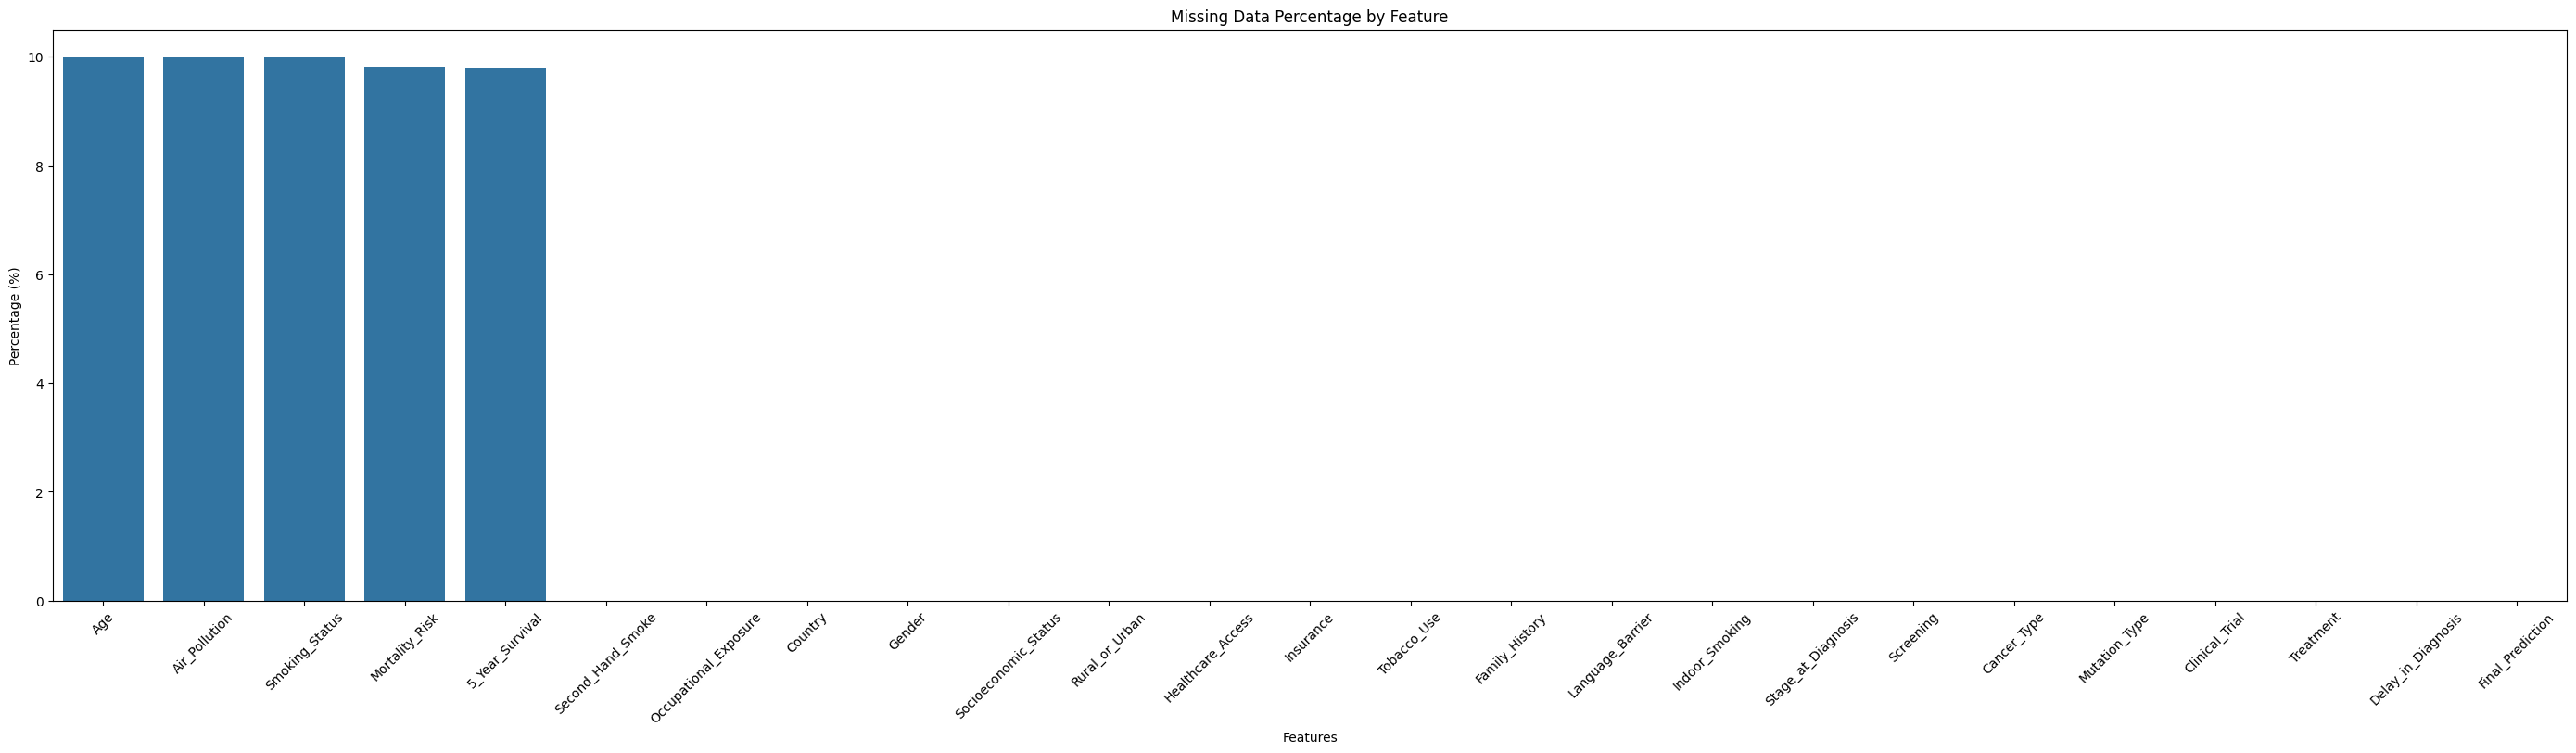

In [106]:

missing_percentage = data.isna().sum() / len(data) * 100
missing_percentage = missing_percentage.to_frame(name='Missing Percentage').sort_values(
    by='Missing Percentage', ascending=False
)

plt.figure(figsize=(35, 8))
sns.barplot(x=missing_percentage.index, y='Missing Percentage', data=missing_percentage)
plt.xticks(rotation=45)
plt.title("Missing Data Percentage by Feature")
plt.xlabel("Features")
plt.ylabel("Percentage (%)")
plt.show()


## Missing Data Count

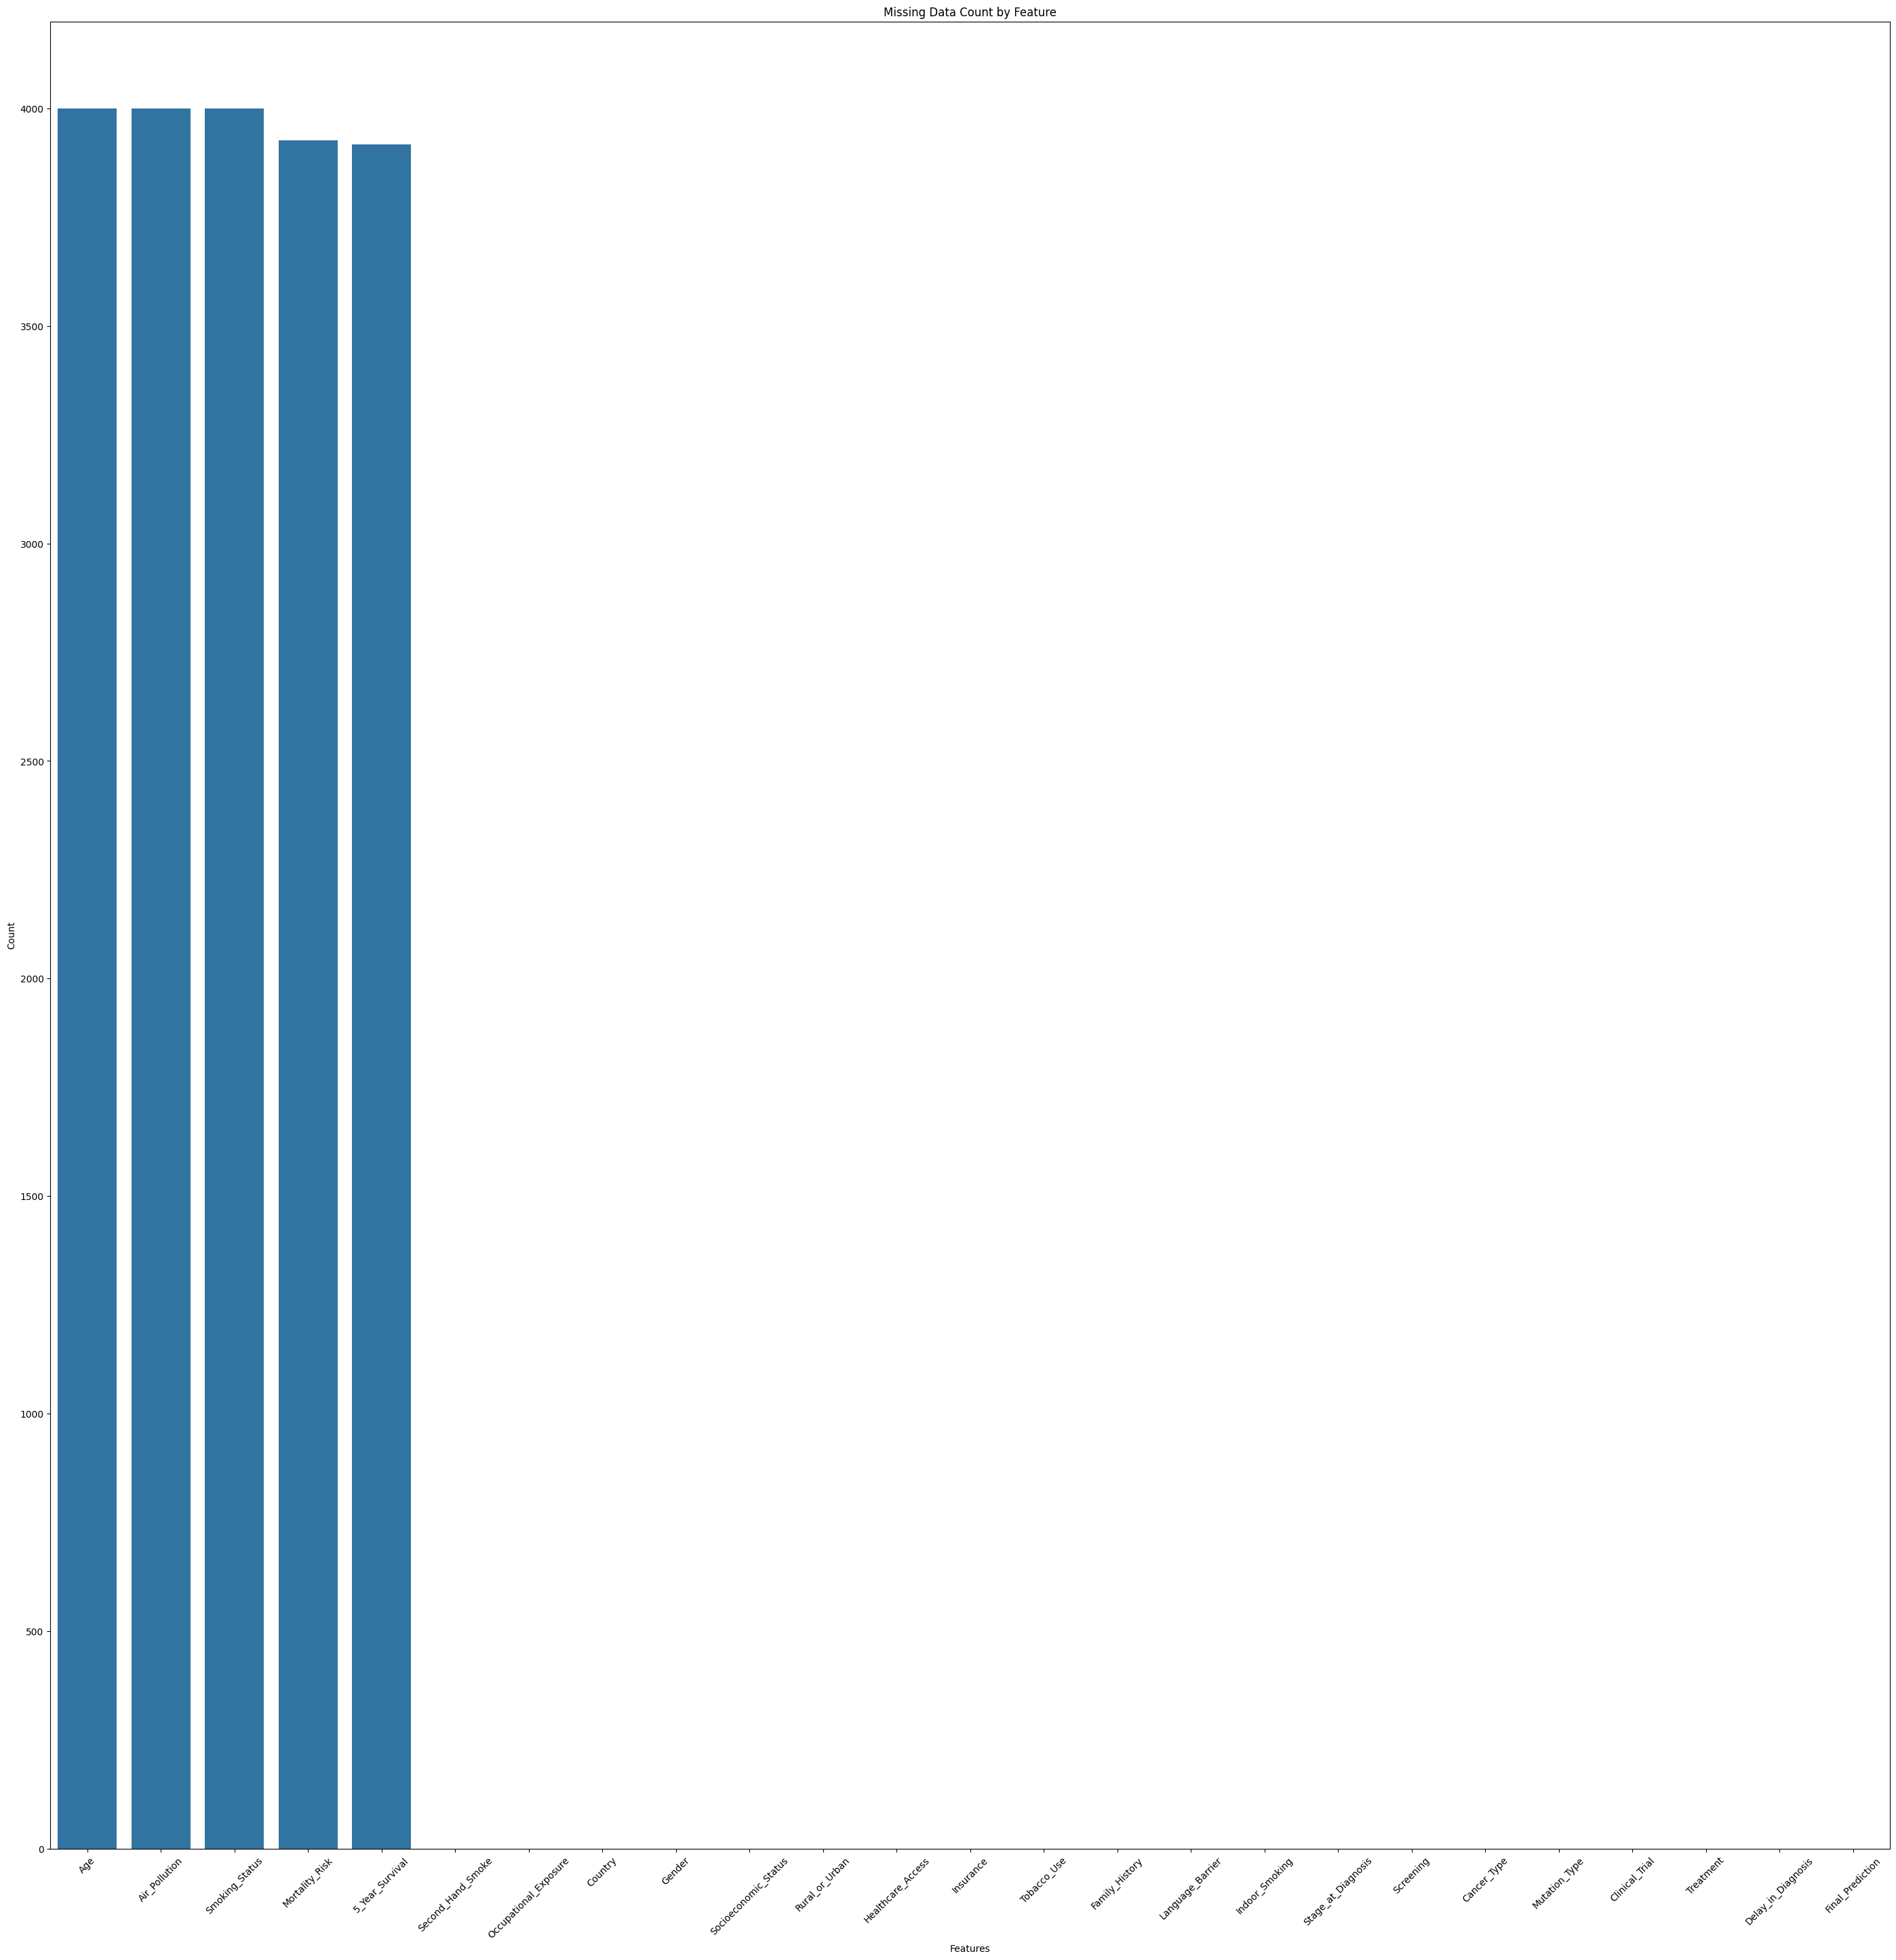

In [107]:

missing_count = data.isna().sum()
missing_count = missing_count.to_frame(name='Missing Count').sort_values(
    by='Missing Count', ascending=False
)
plt.figure(figsize=(35, 35))
sns.barplot(x=missing_count.index, y='Missing Count', data=missing_count)
plt.xticks(rotation=45)
plt.title("Missing Data Count by Feature")
plt.xlabel("Features")
plt.ylabel("Count")
plt.show()


## Outliers

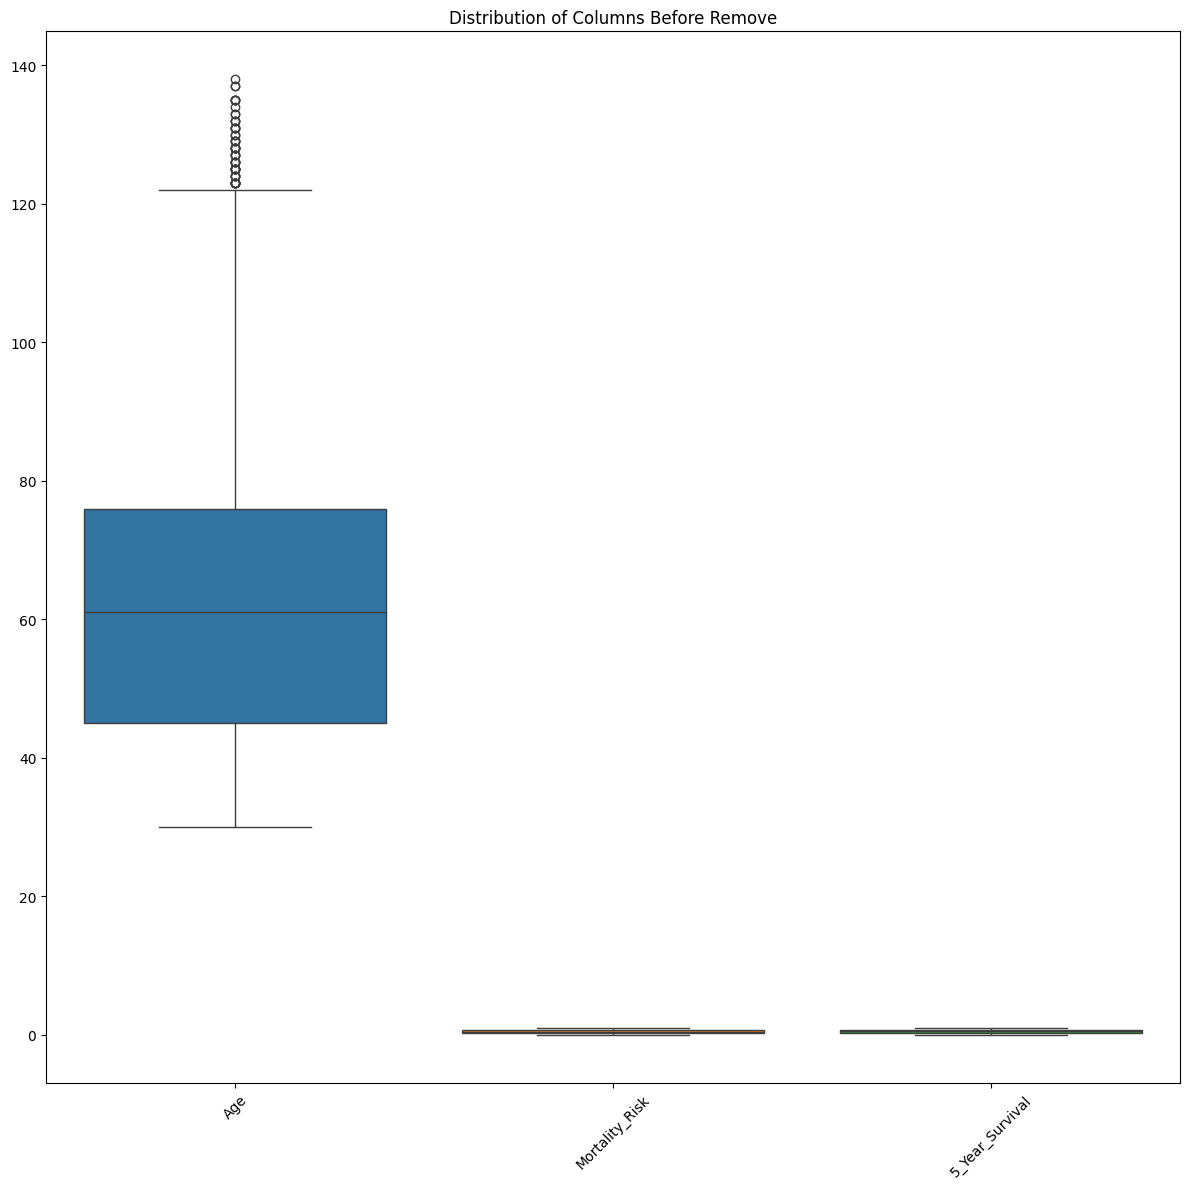

In [108]:
plt.figure(figsize=(12,12))
sns.boxplot(data=data[data.columns])
plt.title("Distribution of Columns Before Remove")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [109]:
def outlier_removal(data, column):
    Q1 = data[column].quantile(0.25) #25% of the data values are less than or equal to Q1 (lines in min,max of boxplot)
    Q3 = data[column].quantile(0.75) #75% the box in boxplot chart
    IQR = Q3 - Q1#The spread of the middle 50% of the data
    lower_bound = Q1 - 1.5 * IQR#Standard statistical rule (Tukey’s method)Excludes extreme abnormal values
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

for col in data.columns:
   if data[col].dtype!='object' :
    data = outlier_removal(data, col)
    

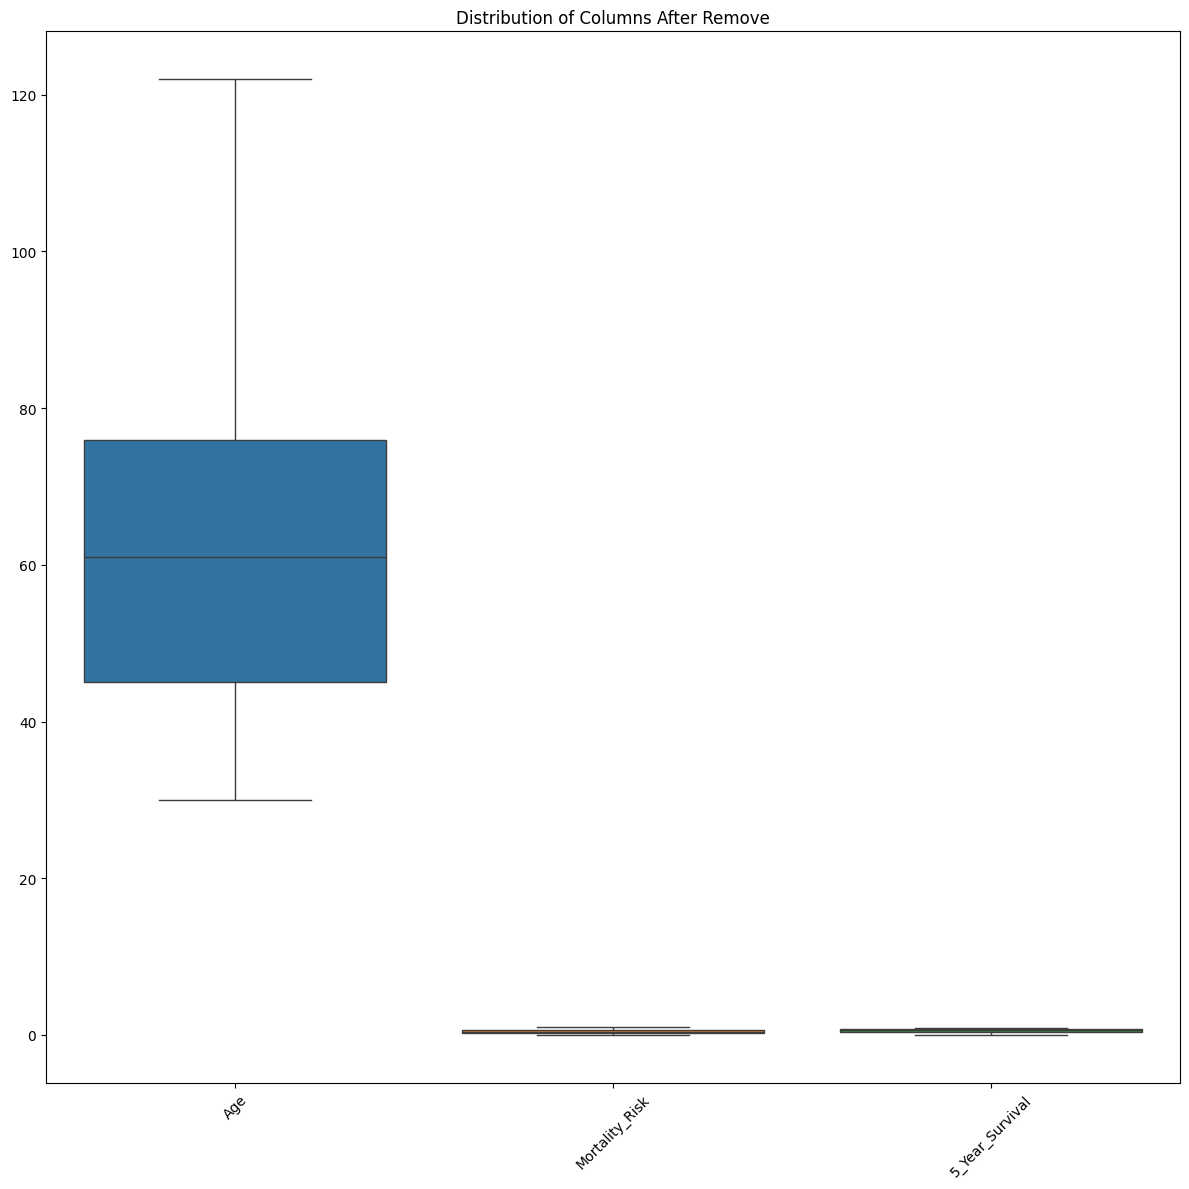

In [110]:
plt.figure(figsize=(12,12))
sns.boxplot(data=data[data.columns])
plt.title("Distribution of Columns After Remove")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


`No Outliers Existed`

## Numeric Data Stats

In [111]:
data.describe().T # T=dataframe

count       mean        std    min     25%     50%     75%  \
Age              29196.0  60.743355  18.220136  30.00  45.000  61.000  76.000   
Mortality_Risk   29196.0   0.483812   0.270467   0.05   0.227   0.378   0.673   
5_Year_Survival  29196.0   0.516188   0.270467   0.00   0.327   0.622   0.773   

                    max  
Age              122.00  
Mortality_Risk     1.00  
5_Year_Survival    0.95

## Values Description

In [112]:
cols = data.columns

summary = []

for col in cols:
    summary.append({
        "Column": col,
        "Unique Values": data[col].nunique(),
        "Most Frequent": data[col].mode()[0],
        "Frequency": data[col].value_counts().iloc[0], #1st Frequent feature
        "Frequency Percentage":(data[col].value_counts().iloc[0]/data[col].shape)*100
    })

pd.DataFrame(summary)


Column  Unique Values Most Frequent  Frequency  \
0                 Country             10         India       2994   
1                     Age             93          65.0        528   
2                  Gender              2          Male      14609   
3          Smoking_Status              3    Non-Smoker      10547   
4       Second_Hand_Smoke              2            No      20430   
5           Air_Pollution              3        Medium      13142   
6   Occupational_Exposure              2            No      23202   
7          Rural_or_Urban              2         Urban      17548   
8    Socioeconomic_Status              3        Middle      14528   
9       Healthcare_Access              3       Limited      11642   
10              Insurance              2            No      16011   
11       Language_Barrier              2            No      26364   
12         Indoor_Smoking              2            No      24894   
13            Tobacco_Use              2            No      17555   
14         Family_History              2            No      17457   
15              Screening              2            No      23723   
16     Stage_at_Diagnosis              4            II       8378   
17            Cancer_Type              3          None      23329   
18          Mutation_Type              4          None      26294   
19              Treatment              3          None      24685   
20         Clinical_Trial              2            No      24667   
21     Delay_in_Diagnosis              2            No      21010   
22         Mortality_Risk            449           1.0        675   
23        5_Year_Survival            448           0.0        675   
24       Final_Prediction              2           Yes      14620   

    Frequency Percentage  
0   [10.254829428688861]  
1   [1.8084669132757913]  
2   [50.037676394026576]  
3    [36.12481161802987]  
4    [69.97533908754625]  
5   [45.013015481572815]  
6    [79.46979038224414]  
7   [60.104123852582546]  
8    [49.76024112892177]  
9   [39.875325387039325]  
10  [54.839704069050555]  
11   [90.30004110152076]  
12   [85.26510480887794]  
13   [60.12809973969036]  
14  [59.792437320180845]  
15   [81.25428140841211]  
16  [28.695711741334428]  
17   [79.90478147691465]  
18   [90.06028223044252]  
19   [84.54925332237293]  
20   [84.48760104123852]  
21   [71.96191259076585]  
22   [2.311960542540074]  
23   [2.311960542540074]  
24   [50.07535278805316]

In [113]:
categorical_data=data.select_dtypes(include='object')
numerical_data=data.select_dtypes(include=['float64','int64','int32','float32'])



## NUmerical Data Visualization

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Mortality_Risk'}>],
       [<Axes: title={'center': '5_Year_Survival'}>, <Axes: >]],
      dtype=object)

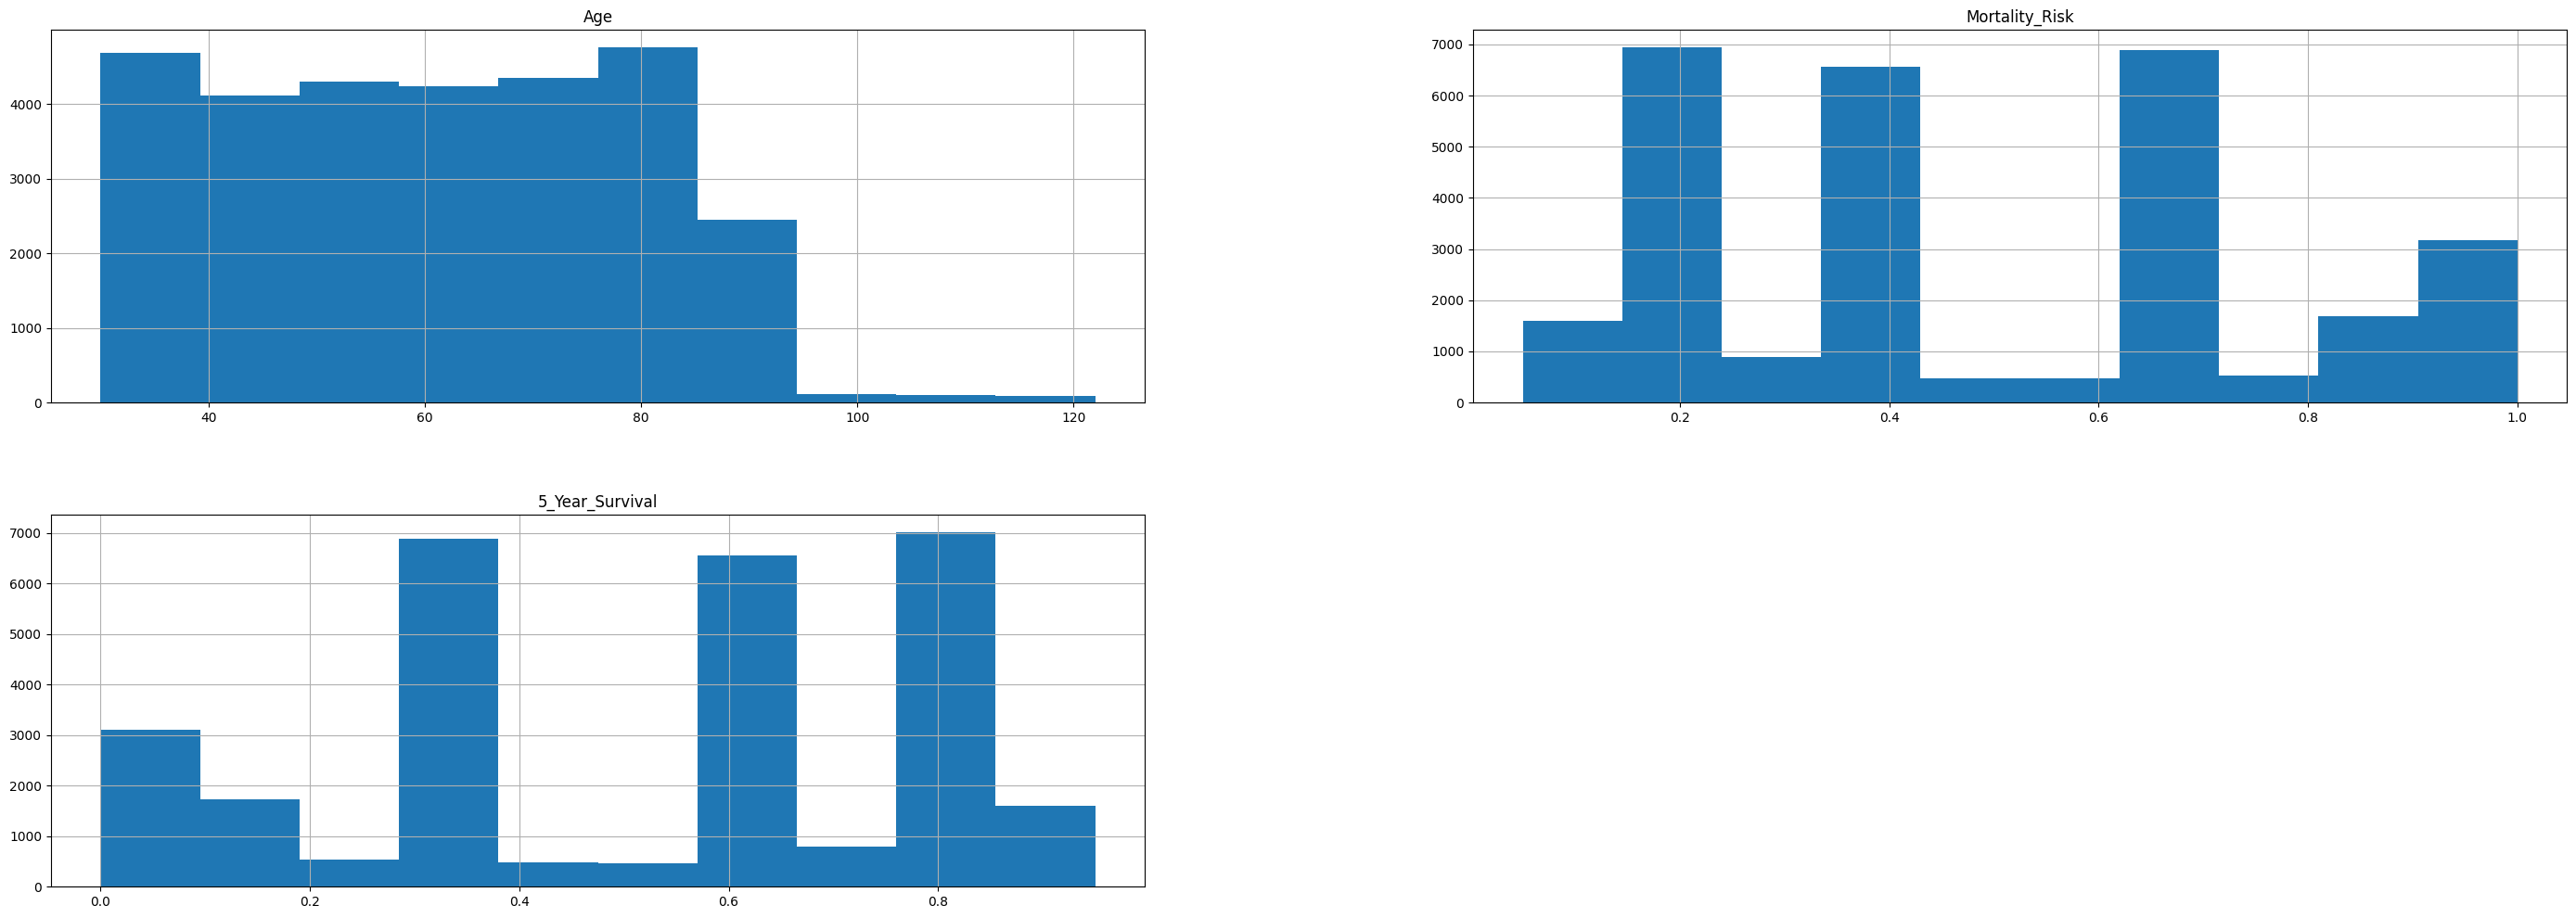

In [114]:
numerical_data.hist(figsize=(35,12))

## Categorical Data Visualization

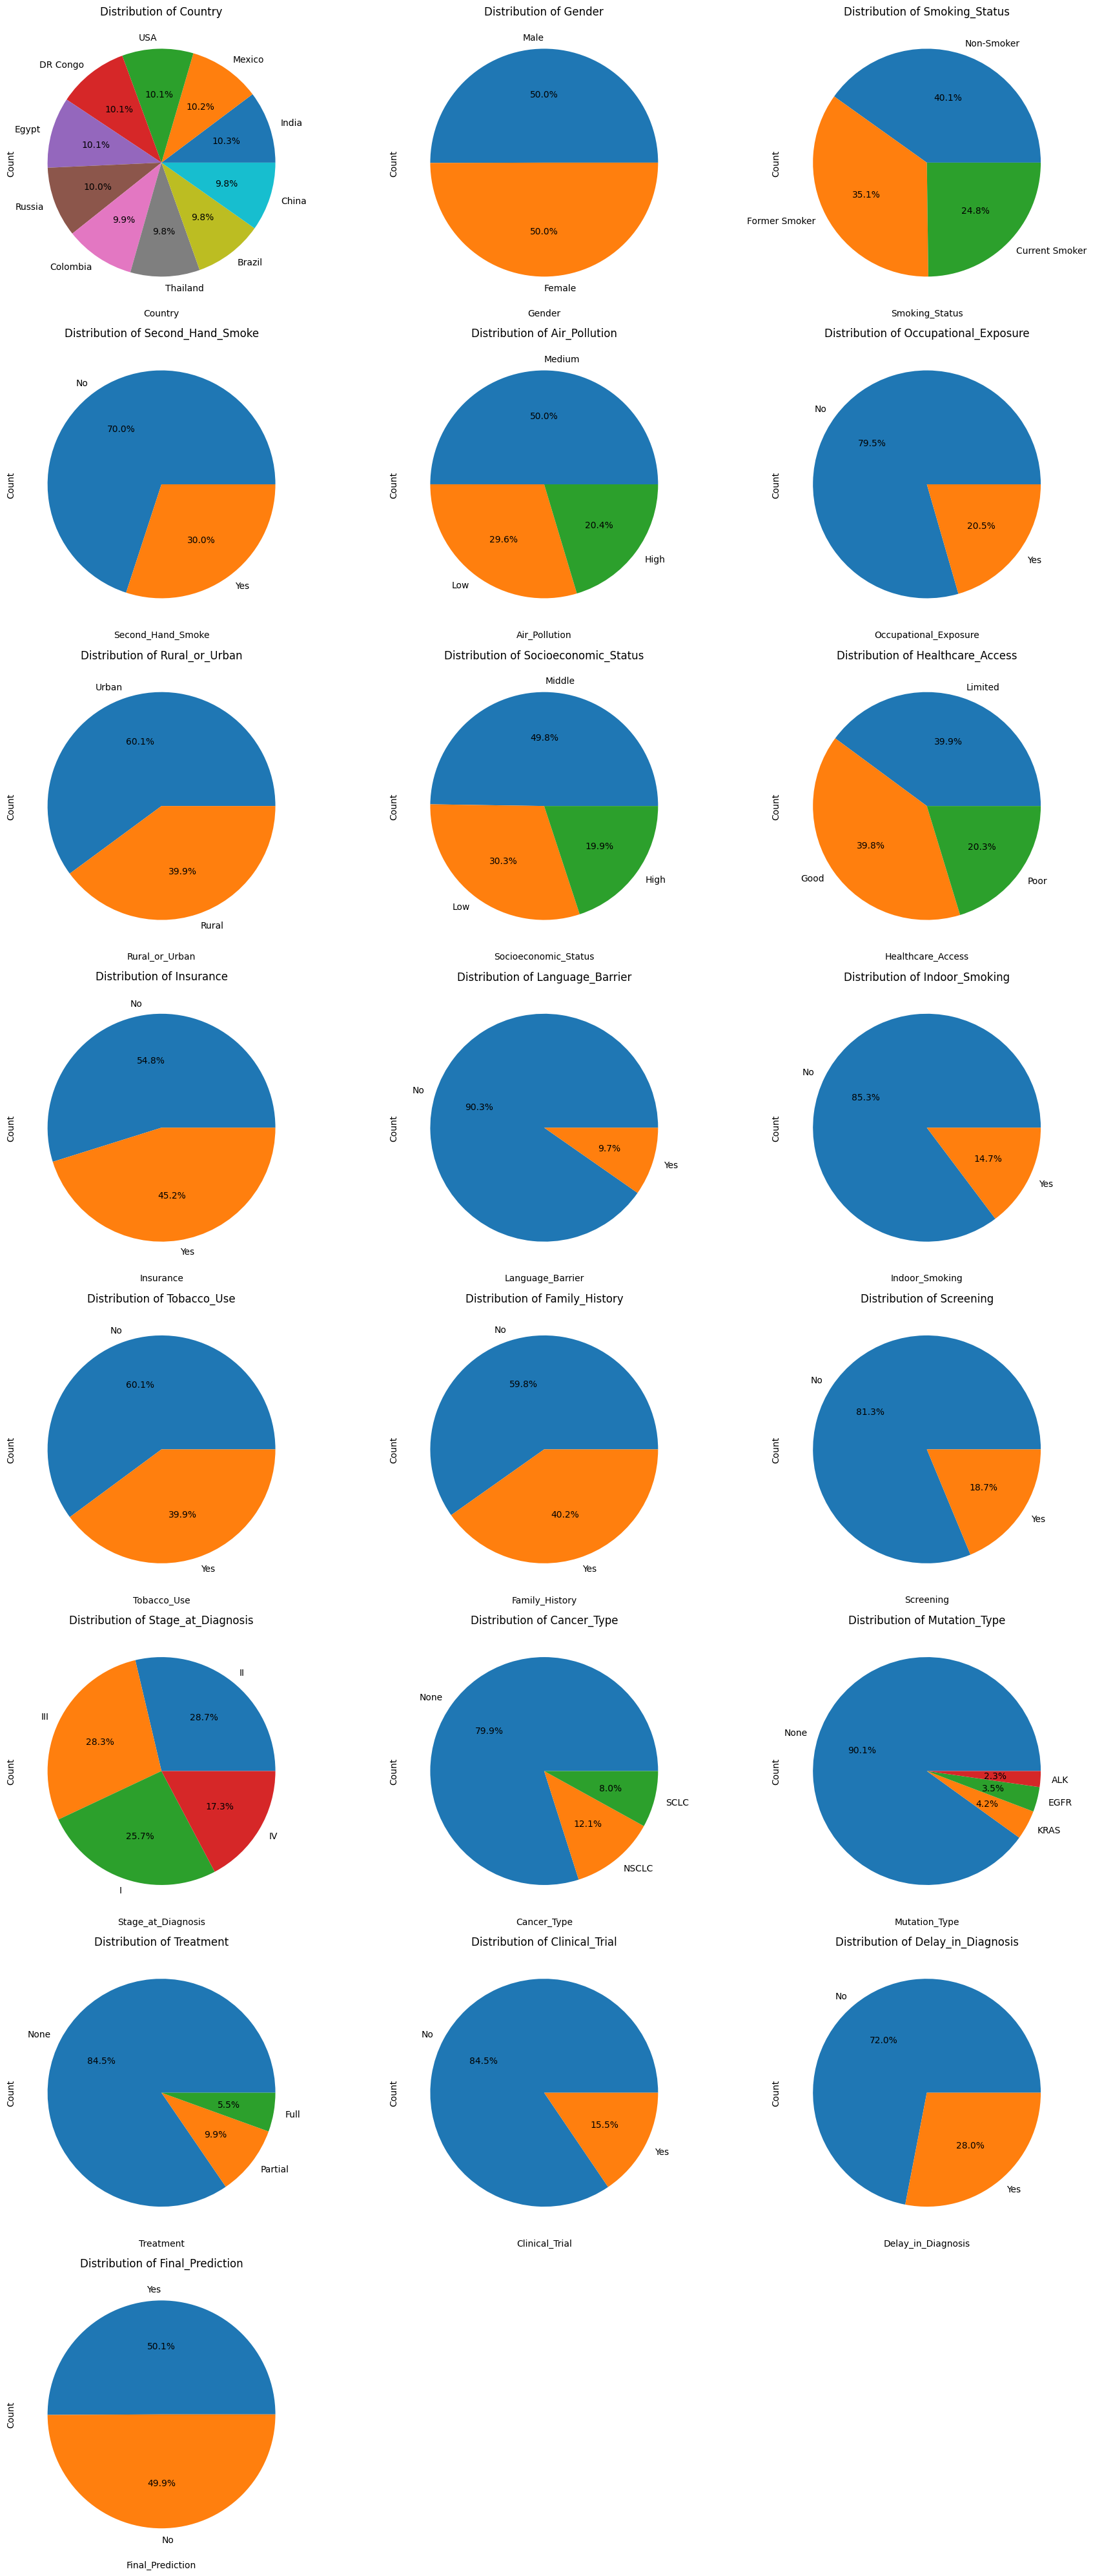

In [115]:

cols = categorical_data.columns
n_cols = 3                       # plots per row
n_rows = math.ceil(len(cols) / n_cols) # create dynamic plots

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten() #convert 2d list into 1d list 

for i, col in enumerate(cols):
    categorical_data[col].value_counts().plot(
        kind='pie',
        ax=axes[i],
        autopct='%1.1f%%'#percentages with one decimal display
    )
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Distribution of {col}')

# Remove unused empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()# adjust spaceing
plt.show()


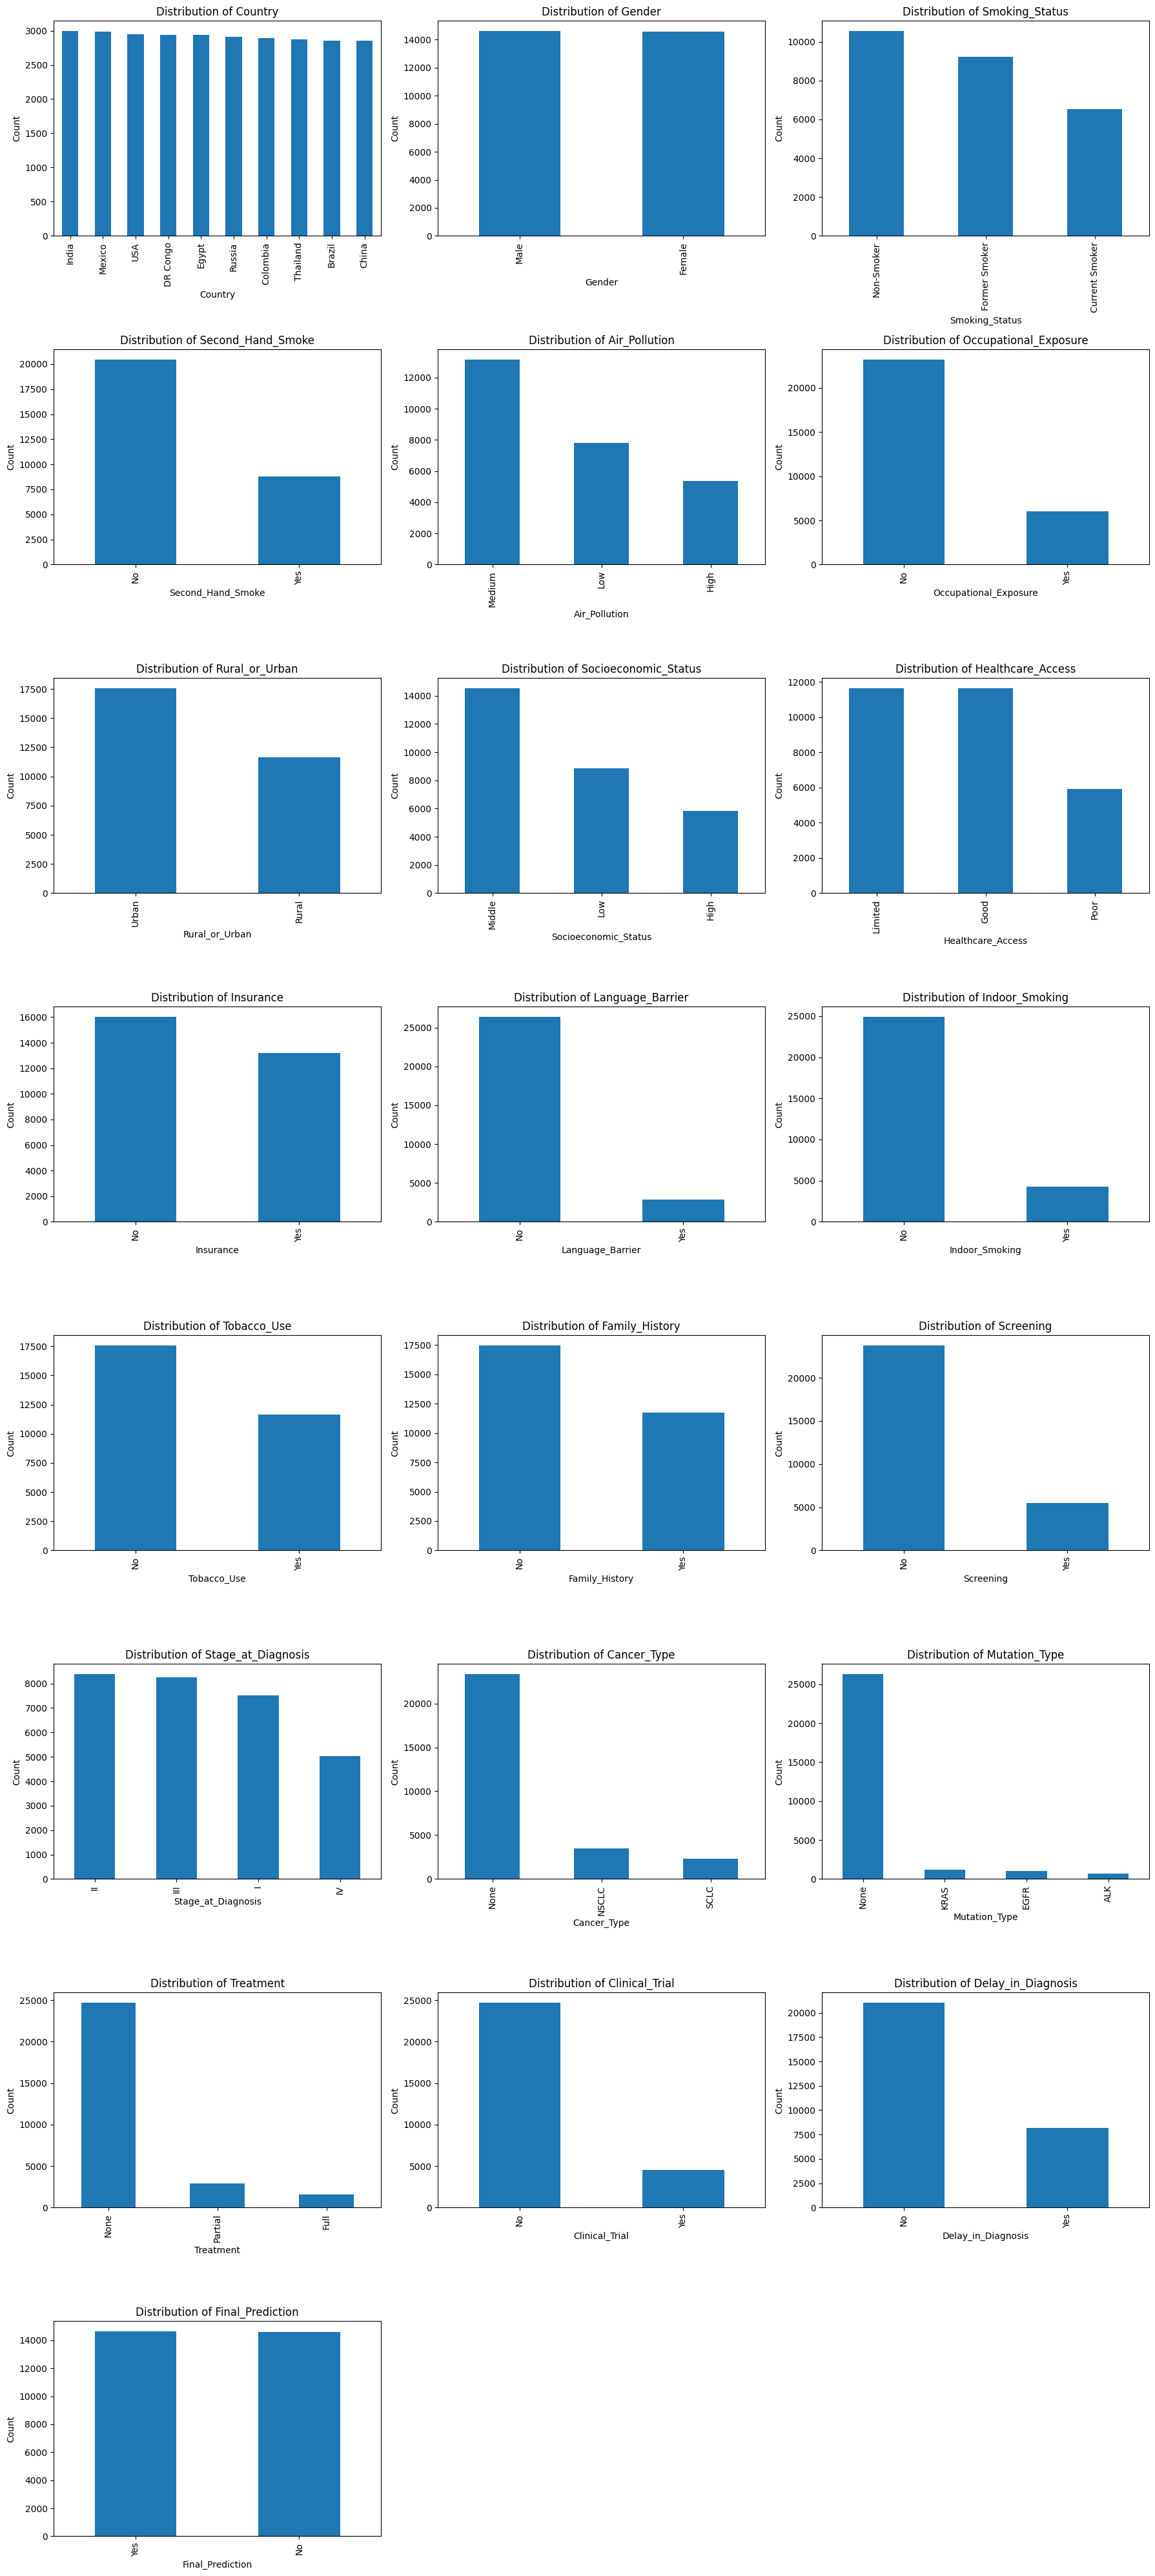

In [116]:
cols = categorical_data.columns
n_cols = 3
n_rows = math.ceil(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cols):
    categorical_data[col].value_counts().plot(
        kind='bar',
        ax=axes[i]
    )
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Distribution of {col}')

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Univarate Analysis (Distribution For Single Feature)

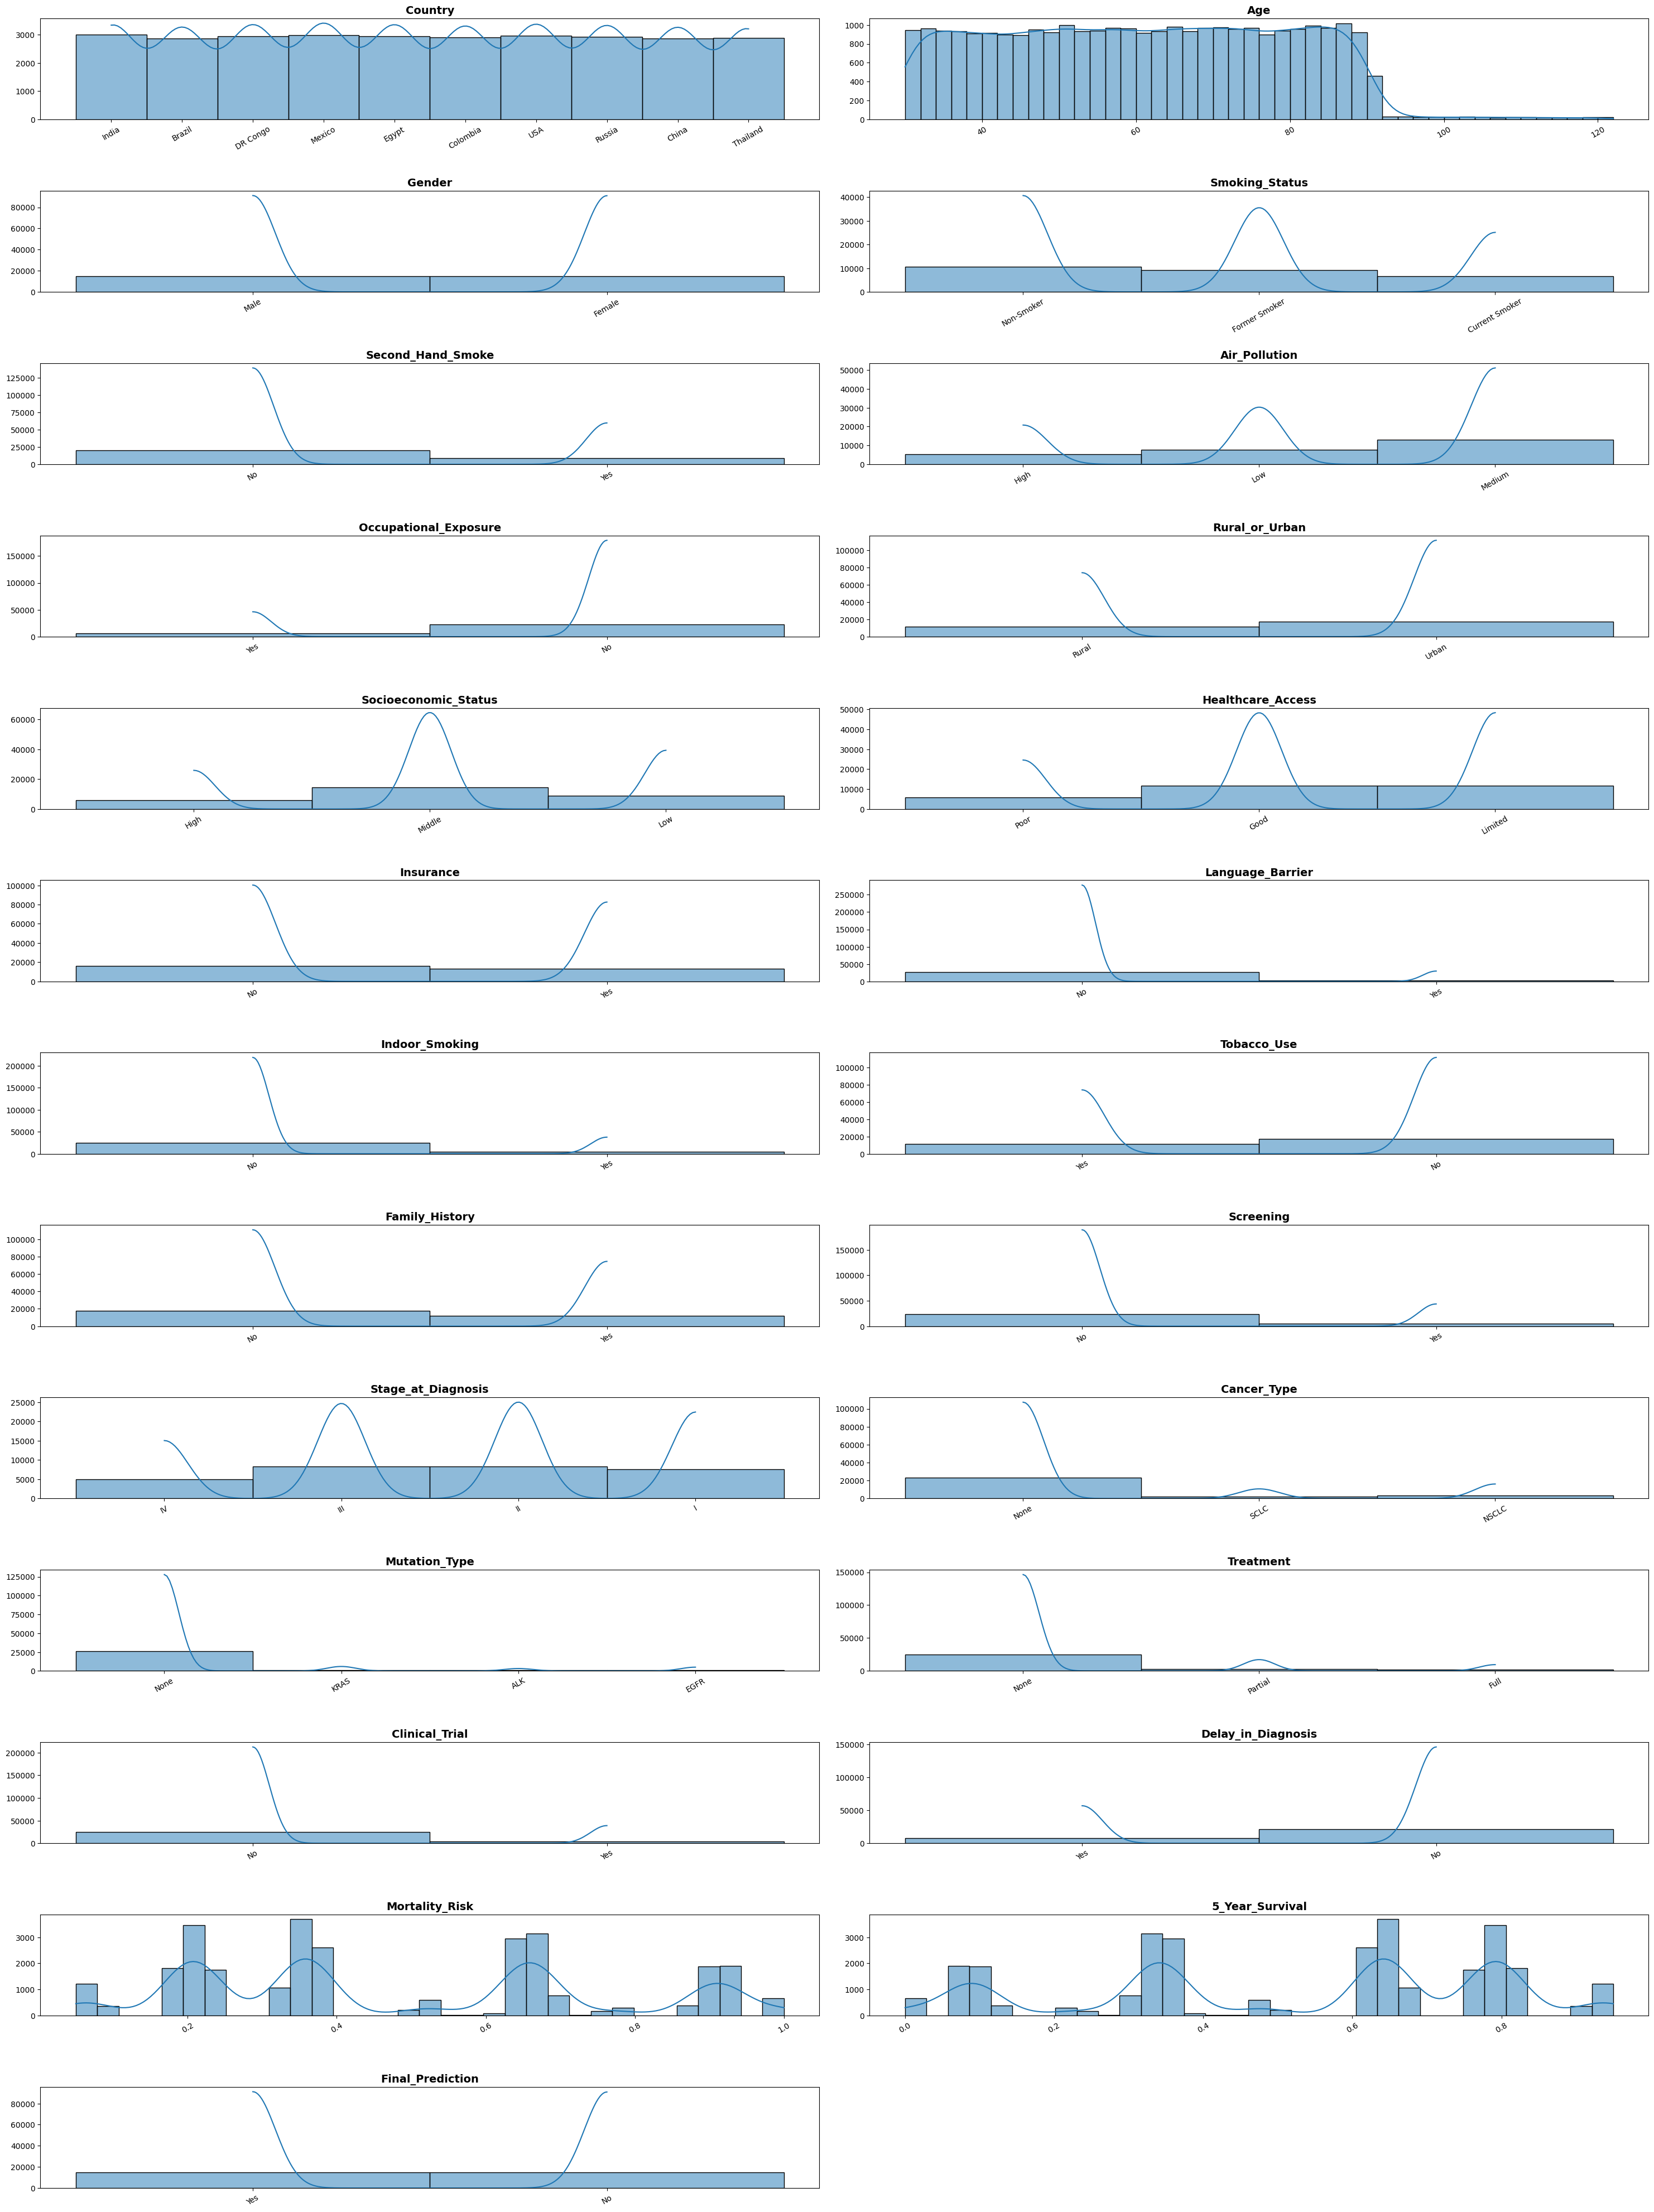

In [117]:
plt.figure(figsize=(30, 40))
i=1
for  col in data.columns:
    plt.subplot(13, 2, i)

    sns.histplot(data[col], kde=True)# kde add curve on top of the histogram

    plt.title(col, fontsize=14, fontweight='bold')
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks(rotation=30, fontsize=10)
    plt.yticks(fontsize=10)
    i+=1

    plt.grid(False)
plt.tight_layout(pad=2.0)
plt.show()
#data[col] is 'series' from 'dataframe'

## Bi Varate Analysis (Relationship Between two Variables)

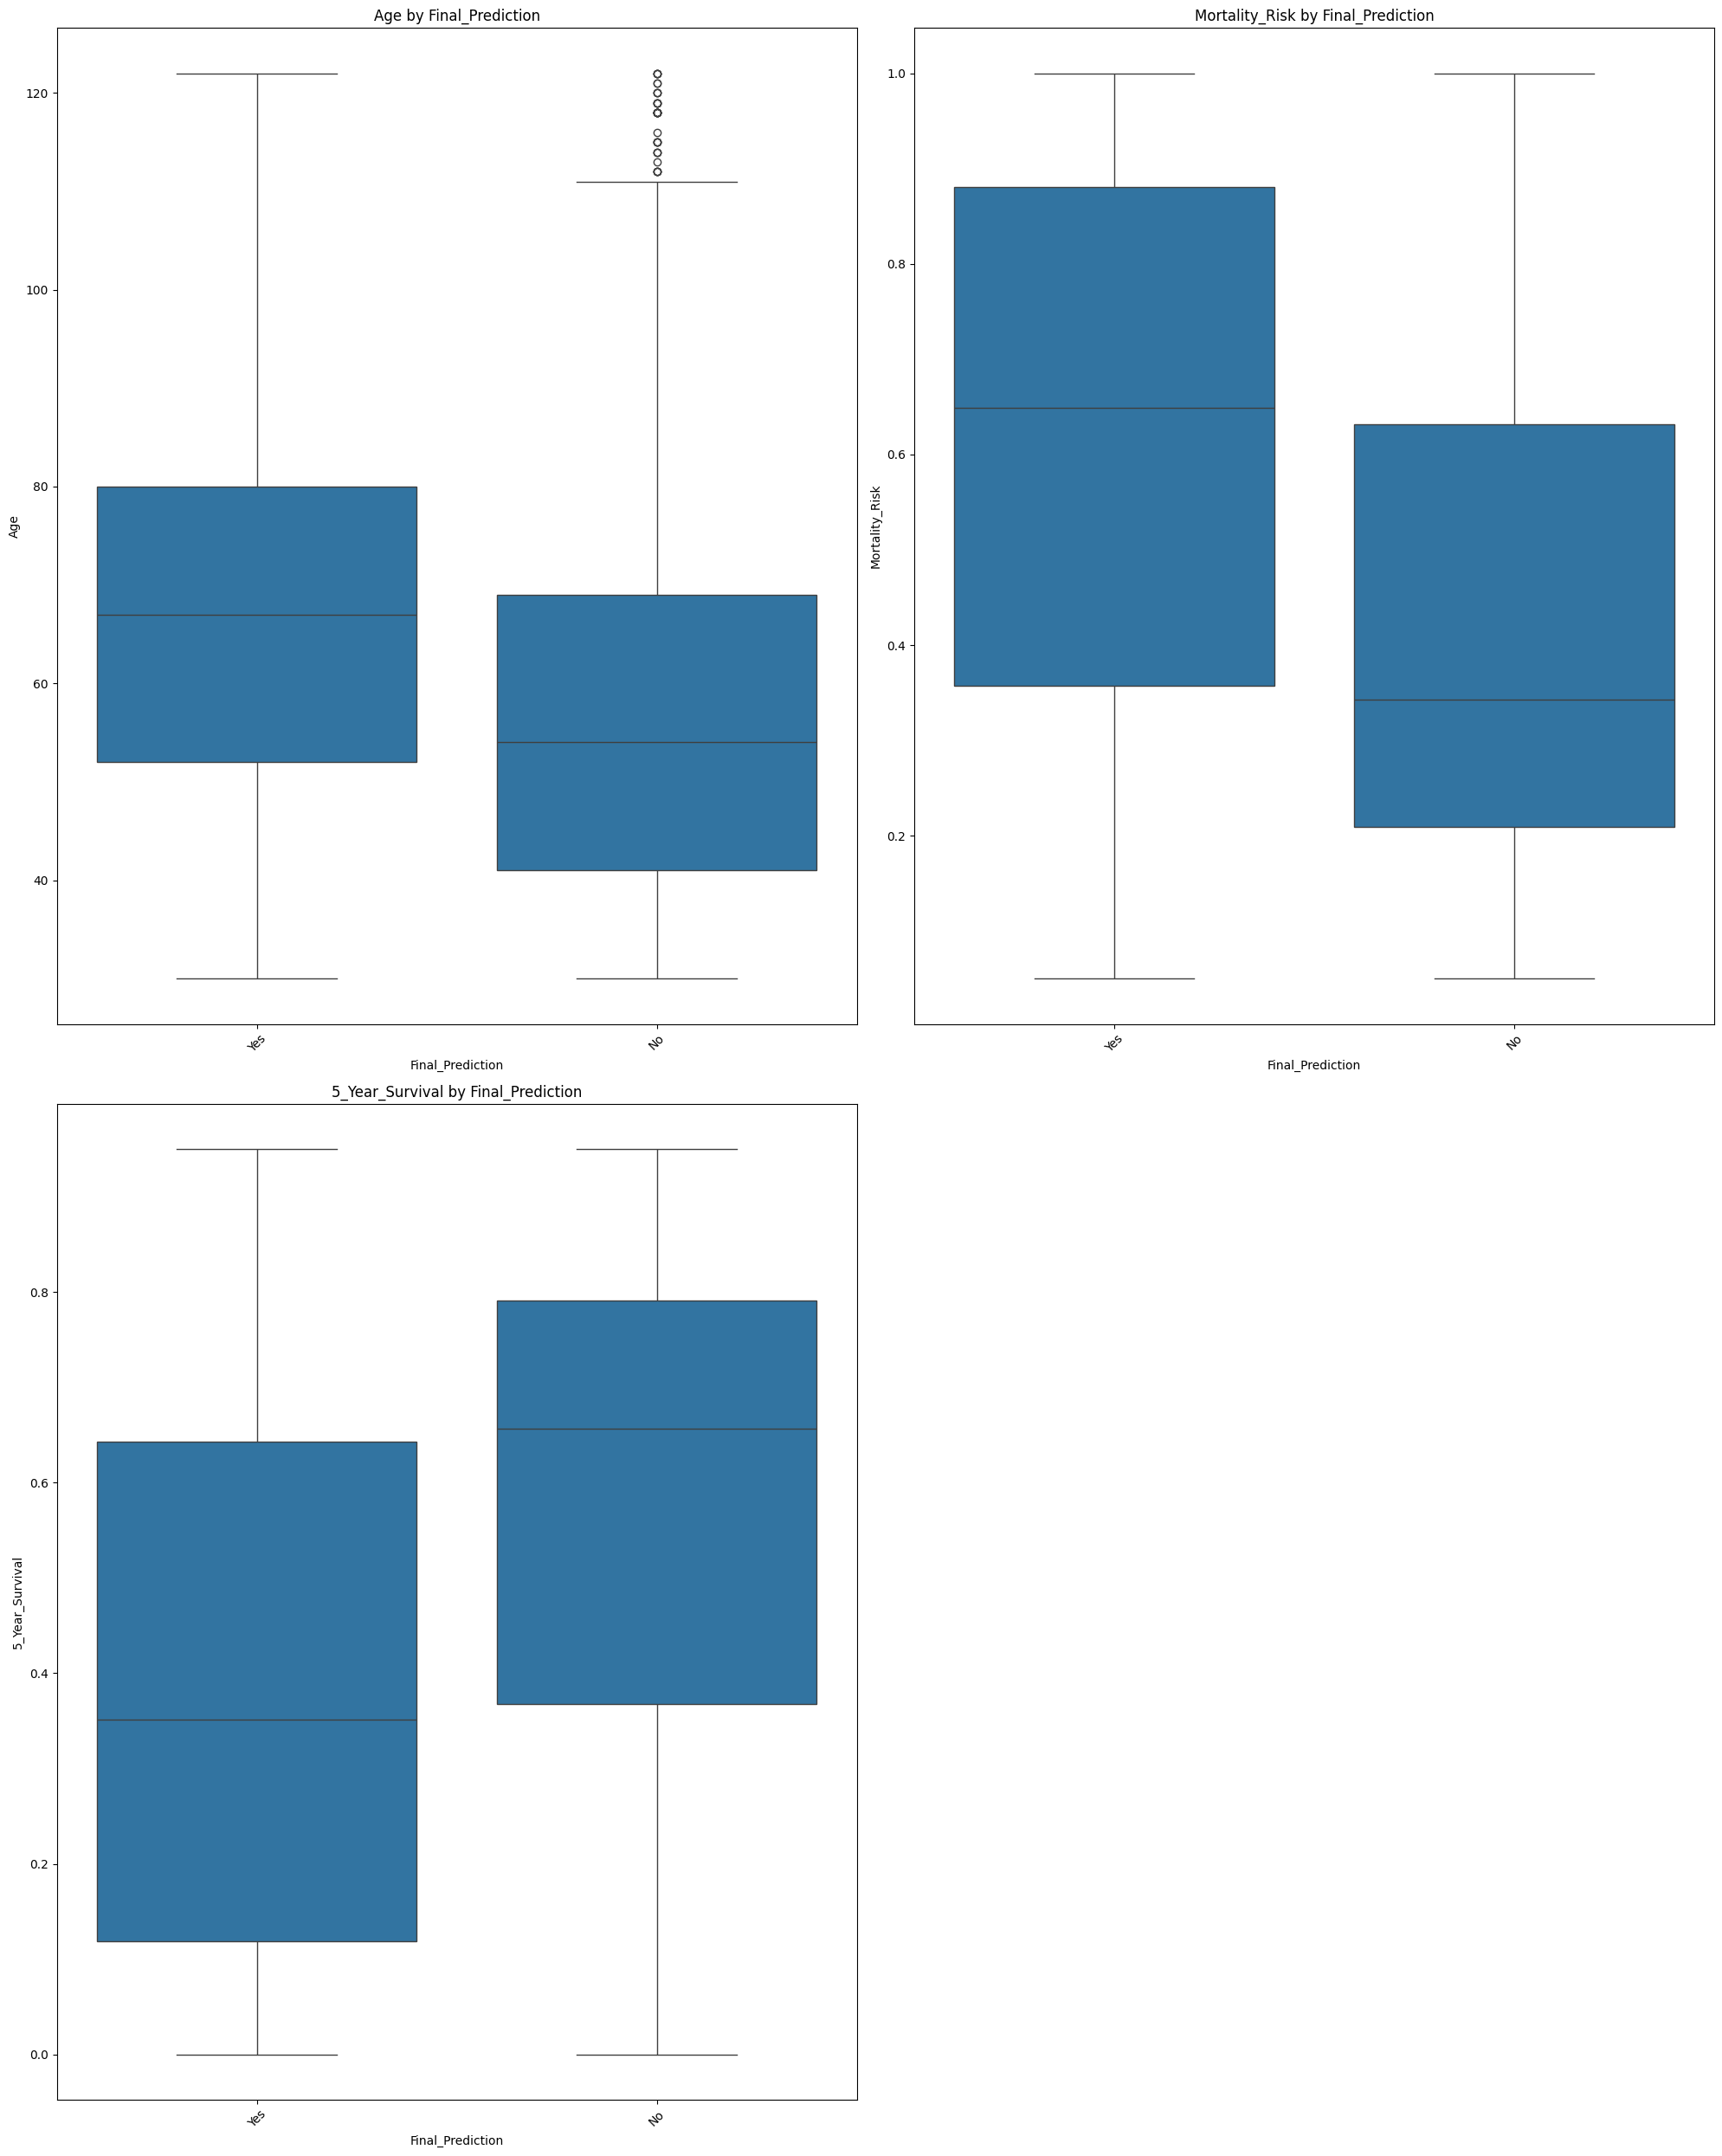

In [118]:
numeric_cols = data.select_dtypes(include=np.number).columns

plt.figure(figsize=(20, 25))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)  
    sns.boxplot(x='Final_Prediction', y=col, data=data)
    plt.xticks(rotation=45)
    plt.title(f'{col} by Final_Prediction')
plt.tight_layout()
plt.show()

`Still a Noise in continues data`

## Summary of Insights

o Feature types and their preprocessing needs: `Yes`

o Whether scaling is needed: `yes for numerical data (for Distance_based and Gradient_decent based models)`

o Whether balancing is needed: `yes`

o Any important observations before modeling: `[Data Imputation Need  - Scaling Needed - Drop Unimportant Features]`

<hr style="border: 2px solid #2AAC92; width: 80%;">
<h1 style="text-align:center; font-family: 'Arial', sans-serif; color : white;">
4 - Preprocessing
</h1>
<hr style="border: 2px solid #2AAC92; width: 80%;">

## Data Cleaning

In [119]:
data_clean = data.drop(columns=['Language_Barrier','Country'])

                               # ^ unimportant features 

In [ ]:
data_clean.dropna(inplace=True)
data_clean.shape 
# drop is better because dataset is already big and drop willnot effect on training

(23669, 23)

In [121]:
data_clean.isnull().sum()

Age                      0
Gender                   0
Smoking_Status           0
Second_Hand_Smoke        0
Air_Pollution            0
Occupational_Exposure    0
Rural_or_Urban           0
Socioeconomic_Status     0
Healthcare_Access        0
Insurance                0
Indoor_Smoking           0
Tobacco_Use              0
Family_History           0
Screening                0
Stage_at_Diagnosis       0
Cancer_Type              0
Mutation_Type            0
Treatment                0
Clinical_Trial           0
Delay_in_Diagnosis       0
Mortality_Risk           0
5_Year_Survival          0
Final_Prediction         0
dtype: int64

In [167]:
for col in data_clean.columns:
  print(f'{col}:\n{data_clean[col].unique()}')
  print('--------')

Age:
[ 80.  51.  72.  41.  56.  88.  69.  75.  81.  76.  52.  73.  48.  85.
  89.  67.  45.  61.  94.  70.  91.  65.  50.  77. 113.  38.  57.  58.
  55.  44.  86.  42.  53.  79.  62.  39.  78.  84.  68.  35.  87.  31.
  36.  43.  59.  32.  34.  37.  30.  46. 108.  49.  60.  40.  47.  64.
  63. 103.  71.  33.  74.  82.  54. 105.  66.  90. 107.  83.  99. 120.
 104. 111. 115. 102. 119. 110.  92.  93.  95. 101. 106. 109.  98. 118.
  97. 116. 114. 117.  96. 100. 112. 122. 121.]
--------
Gender:
['Male' 'Female']
--------
Smoking_Status:
['Non-Smoker' 'Former Smoker' 'Current Smoker']
--------
Second_Hand_Smoke:
['No' 'Yes']
--------
Air_Pollution:
['High' 'Low' 'Medium']
--------
Occupational_Exposure:
['Yes' 'No']
--------
Rural_or_Urban:
['Rural' 'Urban']
--------
Socioeconomic_Status:
['High' 'Middle' 'Low']
--------
Healthcare_Access:
['Poor' 'Good' 'Limited']
--------
Insurance:
['No' 'Yes']
--------
Indoor_Smoking:
['No' 'Yes']
--------
Tobacco_Use:
['Yes' 'No']
--------
Family_Histor

In [123]:

fig = px.histogram(
    data_clean,
    x='Final_Prediction',
    nbins=10, #distribution of values from miniority class to majority class
    title='Target Feature Distribution'
)
fig.show()


The chart above represent 'NO' and 'Yes' , The countplot indicates whether the dataset is balanced between these classes .



## Data Encoding

In [124]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder


In [125]:
data_clean.dtypes

Age                      float64
Gender                    object
Smoking_Status            object
Second_Hand_Smoke         object
Air_Pollution             object
Occupational_Exposure     object
Rural_or_Urban            object
Socioeconomic_Status      object
Healthcare_Access         object
Insurance                 object
Indoor_Smoking            object
Tobacco_Use               object
Family_History            object
Screening                 object
Stage_at_Diagnosis        object
Cancer_Type               object
Mutation_Type             object
Treatment                 object
Clinical_Trial            object
Delay_in_Diagnosis        object
Mortality_Risk           float64
5_Year_Survival          float64
Final_Prediction          object
dtype: object

## Categorize Data For Encoding

In [126]:
categorical_data=data_clean.select_dtypes(include="object")
#print(categorical_data.columns.to_list())
binary_cols=[col for col in categorical_data.columns if categorical_data[col].nunique() == 2]
ordinal_cols=['Air_Pollution','Socioeconomic_Status','Healthcare_Access','Stage_at_Diagnosis','Treatment']
not_nominal_cols =binary_cols+ordinal_cols

binary_data=categorical_data[binary_cols]
Ordinal_data=categorical_data[ordinal_cols]
nominal_data=categorical_data.drop(columns=not_nominal_cols)

data_encode=data_clean.copy(deep=True)

print(binary_data.columns)
print(Ordinal_data.columns)
print(nominal_data.columns)

Index(['Gender', 'Second_Hand_Smoke', 'Occupational_Exposure',
       'Rural_or_Urban', 'Insurance', 'Indoor_Smoking', 'Tobacco_Use',
       'Family_History', 'Screening', 'Clinical_Trial', 'Delay_in_Diagnosis',
       'Final_Prediction'],
      dtype='object')
Index(['Air_Pollution', 'Socioeconomic_Status', 'Healthcare_Access',
       'Stage_at_Diagnosis', 'Treatment'],
      dtype='object')
Index(['Smoking_Status', 'Cancer_Type', 'Mutation_Type'], dtype='object')


### - Label Encoding For Binary Data

In [127]:
binary_encoders = {}

for col in binary_cols:
    le = LabelEncoder()
    data_encode[col] = le.fit_transform(data_encode[col])
    binary_encoders[col] = le




### - Ordinal Encoding For Ordinal Data

In [128]:
cat=[['Low', 'Medium', 'High'],             # Air_Pollution
    ['Low', 'Middle', 'High'],              # Socioeconomic_Status
    ['Poor', 'Limited', 'Good'],            # Healthcare_Access
    ['I','II','III','IV'] ,                  # stage_at_diagoness
    ['None','Partial','Full']]              # treatment                                
oe = OrdinalEncoder(categories=cat)
data_encode[ordinal_cols]=oe.fit_transform(data_encode[ordinal_cols])

### - One-hot Encoding For Nominal Data

In [129]:
data_encoded2=data_encode.copy(deep=True)
data_encoded2 = pd.get_dummies(data_encode)
# covert to nominal onehot and add multiple columns (easier than onehotencoder)
data_encoded2.head(10)

Age  Gender  Second_Hand_Smoke  Air_Pollution  Occupational_Exposure  \
0   80.0       1                  0            2.0                      1   
2   51.0       0                  1            0.0                      1   
3   72.0       0                  0            0.0                      0   
4   41.0       1                  0            1.0                      0   
5   56.0       0                  0            1.0                      0   
7   88.0       1                  0            1.0                      1   
8   69.0       0                  0            1.0                      0   
9   75.0       1                  0            1.0                      1   
11  81.0       0                  0            2.0                      0   
13  76.0       0                  0            2.0                      0   

    Rural_or_Urban  Socioeconomic_Status  Healthcare_Access  Insurance  \
0                0                   2.0                0.0          0   
2                1                   2.0                2.0          0   
3                0                   2.0                0.0          1   
4                0                   2.0                0.0          0   
5                1                   1.0                2.0          1   
7                0                   0.0                1.0          0   
8                1                   1.0                1.0          0   
9                1                   1.0                2.0          0   
11               1                   1.0                2.0          0   
13               0                   0.0                0.0          1   

    Indoor_Smoking  ...  Smoking_Status_Current Smoker  \
0                0  ...                          False   
2                0  ...                          False   
3                0  ...                          False   
4                0  ...                          False   
5                0  ...                          False   
7                0  ...                           True   
8                1  ...                           True   
9                0  ...                           True   
11               0  ...                          False   
13               0  ...                          False   

    Smoking_Status_Former Smoker  Smoking_Status_Non-Smoker  \
0                          False                       True   
2                           True                      False   
3                           True                      False   
4                           True                      False   
5                          False                       True   
7                          False                      False   
8                          False                      False   
9                          False                      False   
11                         False                       True   
13                          True                      False   

    Cancer_Type_NSCLC  Cancer_Type_None  Cancer_Type_SCLC  Mutation_Type_ALK  \
0               False              True             False              False   
2               False              True             False              False   
3               False              True             False              False   
4               False              True             False              False   
5               False              True             False              False   
7               False             False              True              False   
8                True             False             False              False   
9               False             False              True              False   
11              False              True             False              False   
13              False              True             False              False   

    Mutation_Type_EGFR  Mutation_Type_KRAS  Mutation_Type_None  
0                False               False                True 

In [130]:
for i in range(1,10):

    print(f'{data_encoded2[ordinal_cols].to_numpy()[i]}', f'{data_clean[ordinal_cols].to_numpy()[i]}')

[0. 2. 2. 2. 0.] ['Low' 'High' 'Good' np.str_('III') 'None']
[0. 2. 0. 1. 0.] ['Low' 'High' 'Poor' np.str_('II') 'None']
[1. 2. 0. 3. 0.] ['Medium' 'High' 'Poor' np.str_('IV') 'None']
[1. 1. 2. 0. 0.] ['Medium' 'Middle' 'Good' np.str_('I') 'None']
[1. 0. 1. 0. 1.] ['Medium' 'Low' 'Limited' np.str_('I') np.str_('Partial')]
[1. 1. 1. 0. 0.] ['Medium' 'Middle' 'Limited' np.str_('I') np.str_('None')]
[1. 1. 2. 1. 2.] ['Medium' 'Middle' 'Good' np.str_('II') np.str_('Full')]
[2. 1. 2. 0. 0.] ['High' 'Middle' 'Good' np.str_('I') 'None']
[2. 0. 0. 3. 0.] ['High' 'Low' 'Poor' np.str_('IV') 'None']


## Splitting

In [131]:

data_input = data_encoded2.drop(columns='Final_Prediction')
data_output = data_encoded2['Final_Prediction']
data_input.shape

(23669, 29)

In [132]:
data_input.columns.to_list()

['Age',
 'Gender',
 'Second_Hand_Smoke',
 'Air_Pollution',
 'Occupational_Exposure',
 'Rural_or_Urban',
 'Socioeconomic_Status',
 'Healthcare_Access',
 'Insurance',
 'Indoor_Smoking',
 'Tobacco_Use',
 'Family_History',
 'Screening',
 'Stage_at_Diagnosis',
 'Treatment',
 'Clinical_Trial',
 'Delay_in_Diagnosis',
 'Mortality_Risk',
 '5_Year_Survival',
 'Smoking_Status_Current Smoker',
 'Smoking_Status_Former Smoker',
 'Smoking_Status_Non-Smoker',
 'Cancer_Type_NSCLC',
 'Cancer_Type_None',
 'Cancer_Type_SCLC',
 'Mutation_Type_ALK',
 'Mutation_Type_EGFR',
 'Mutation_Type_KRAS',
 'Mutation_Type_None']

In [133]:
data_output.value_counts()

Final_Prediction
1    11845
0    11824
Name: count, dtype: int64

`Balanced Dataset`

In [134]:
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(
    data_input, data_output, test_size=0.30, random_state=0
)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.30, random_state=0
)


## Feature Scaling / Normalization

`In Pipeline Below`
* Need For Models That Distance_based(ex:knn) / Gradient_decent_Based(ex:logistic Regression)

## Relationship Between Features & Each Other

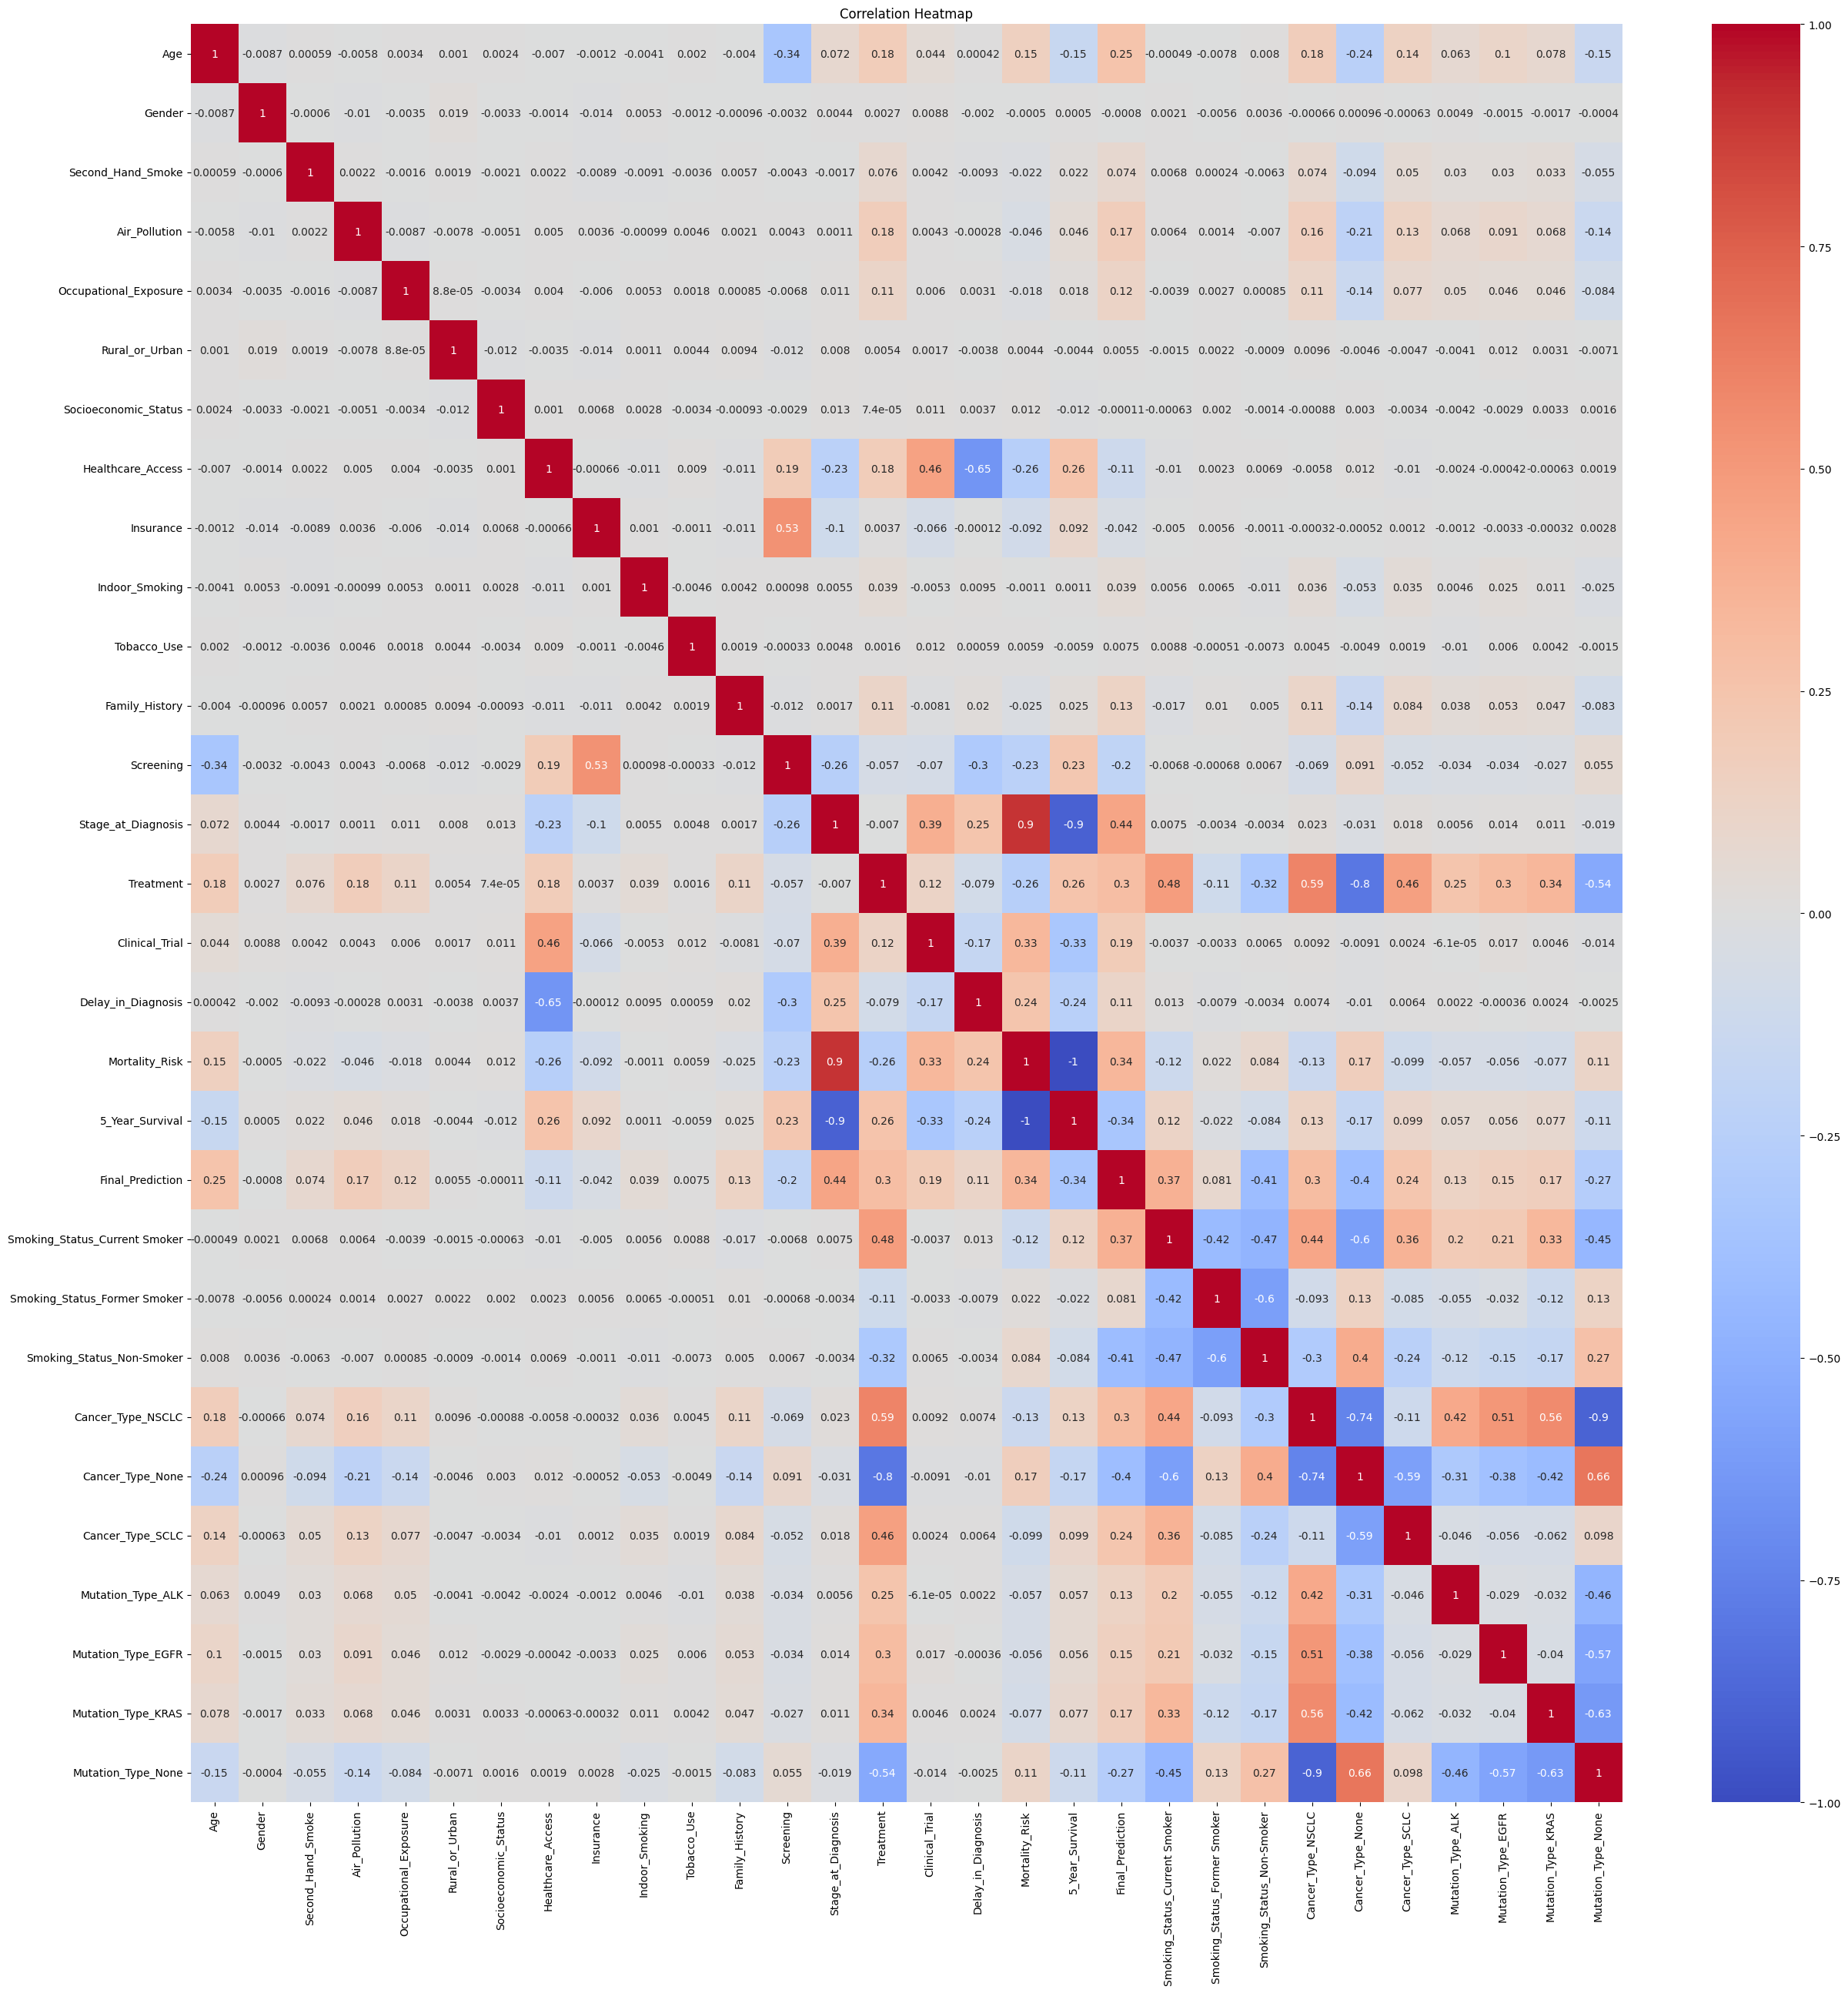

In [135]:
plt.figure(figsize=(30,30))
sns.heatmap(data_encoded2[data_encoded2.columns].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [136]:
print(data_encoded2.columns)


Index(['Age', 'Gender', 'Second_Hand_Smoke', 'Air_Pollution',
       'Occupational_Exposure', 'Rural_or_Urban', 'Socioeconomic_Status',
       'Healthcare_Access', 'Insurance', 'Indoor_Smoking', 'Tobacco_Use',
       'Family_History', 'Screening', 'Stage_at_Diagnosis', 'Treatment',
       'Clinical_Trial', 'Delay_in_Diagnosis', 'Mortality_Risk',
       '5_Year_Survival', 'Final_Prediction', 'Smoking_Status_Current Smoker',
       'Smoking_Status_Former Smoker', 'Smoking_Status_Non-Smoker',
       'Cancer_Type_NSCLC', 'Cancer_Type_None', 'Cancer_Type_SCLC',
       'Mutation_Type_ALK', 'Mutation_Type_EGFR', 'Mutation_Type_KRAS',
       'Mutation_Type_None'],
      dtype='object')


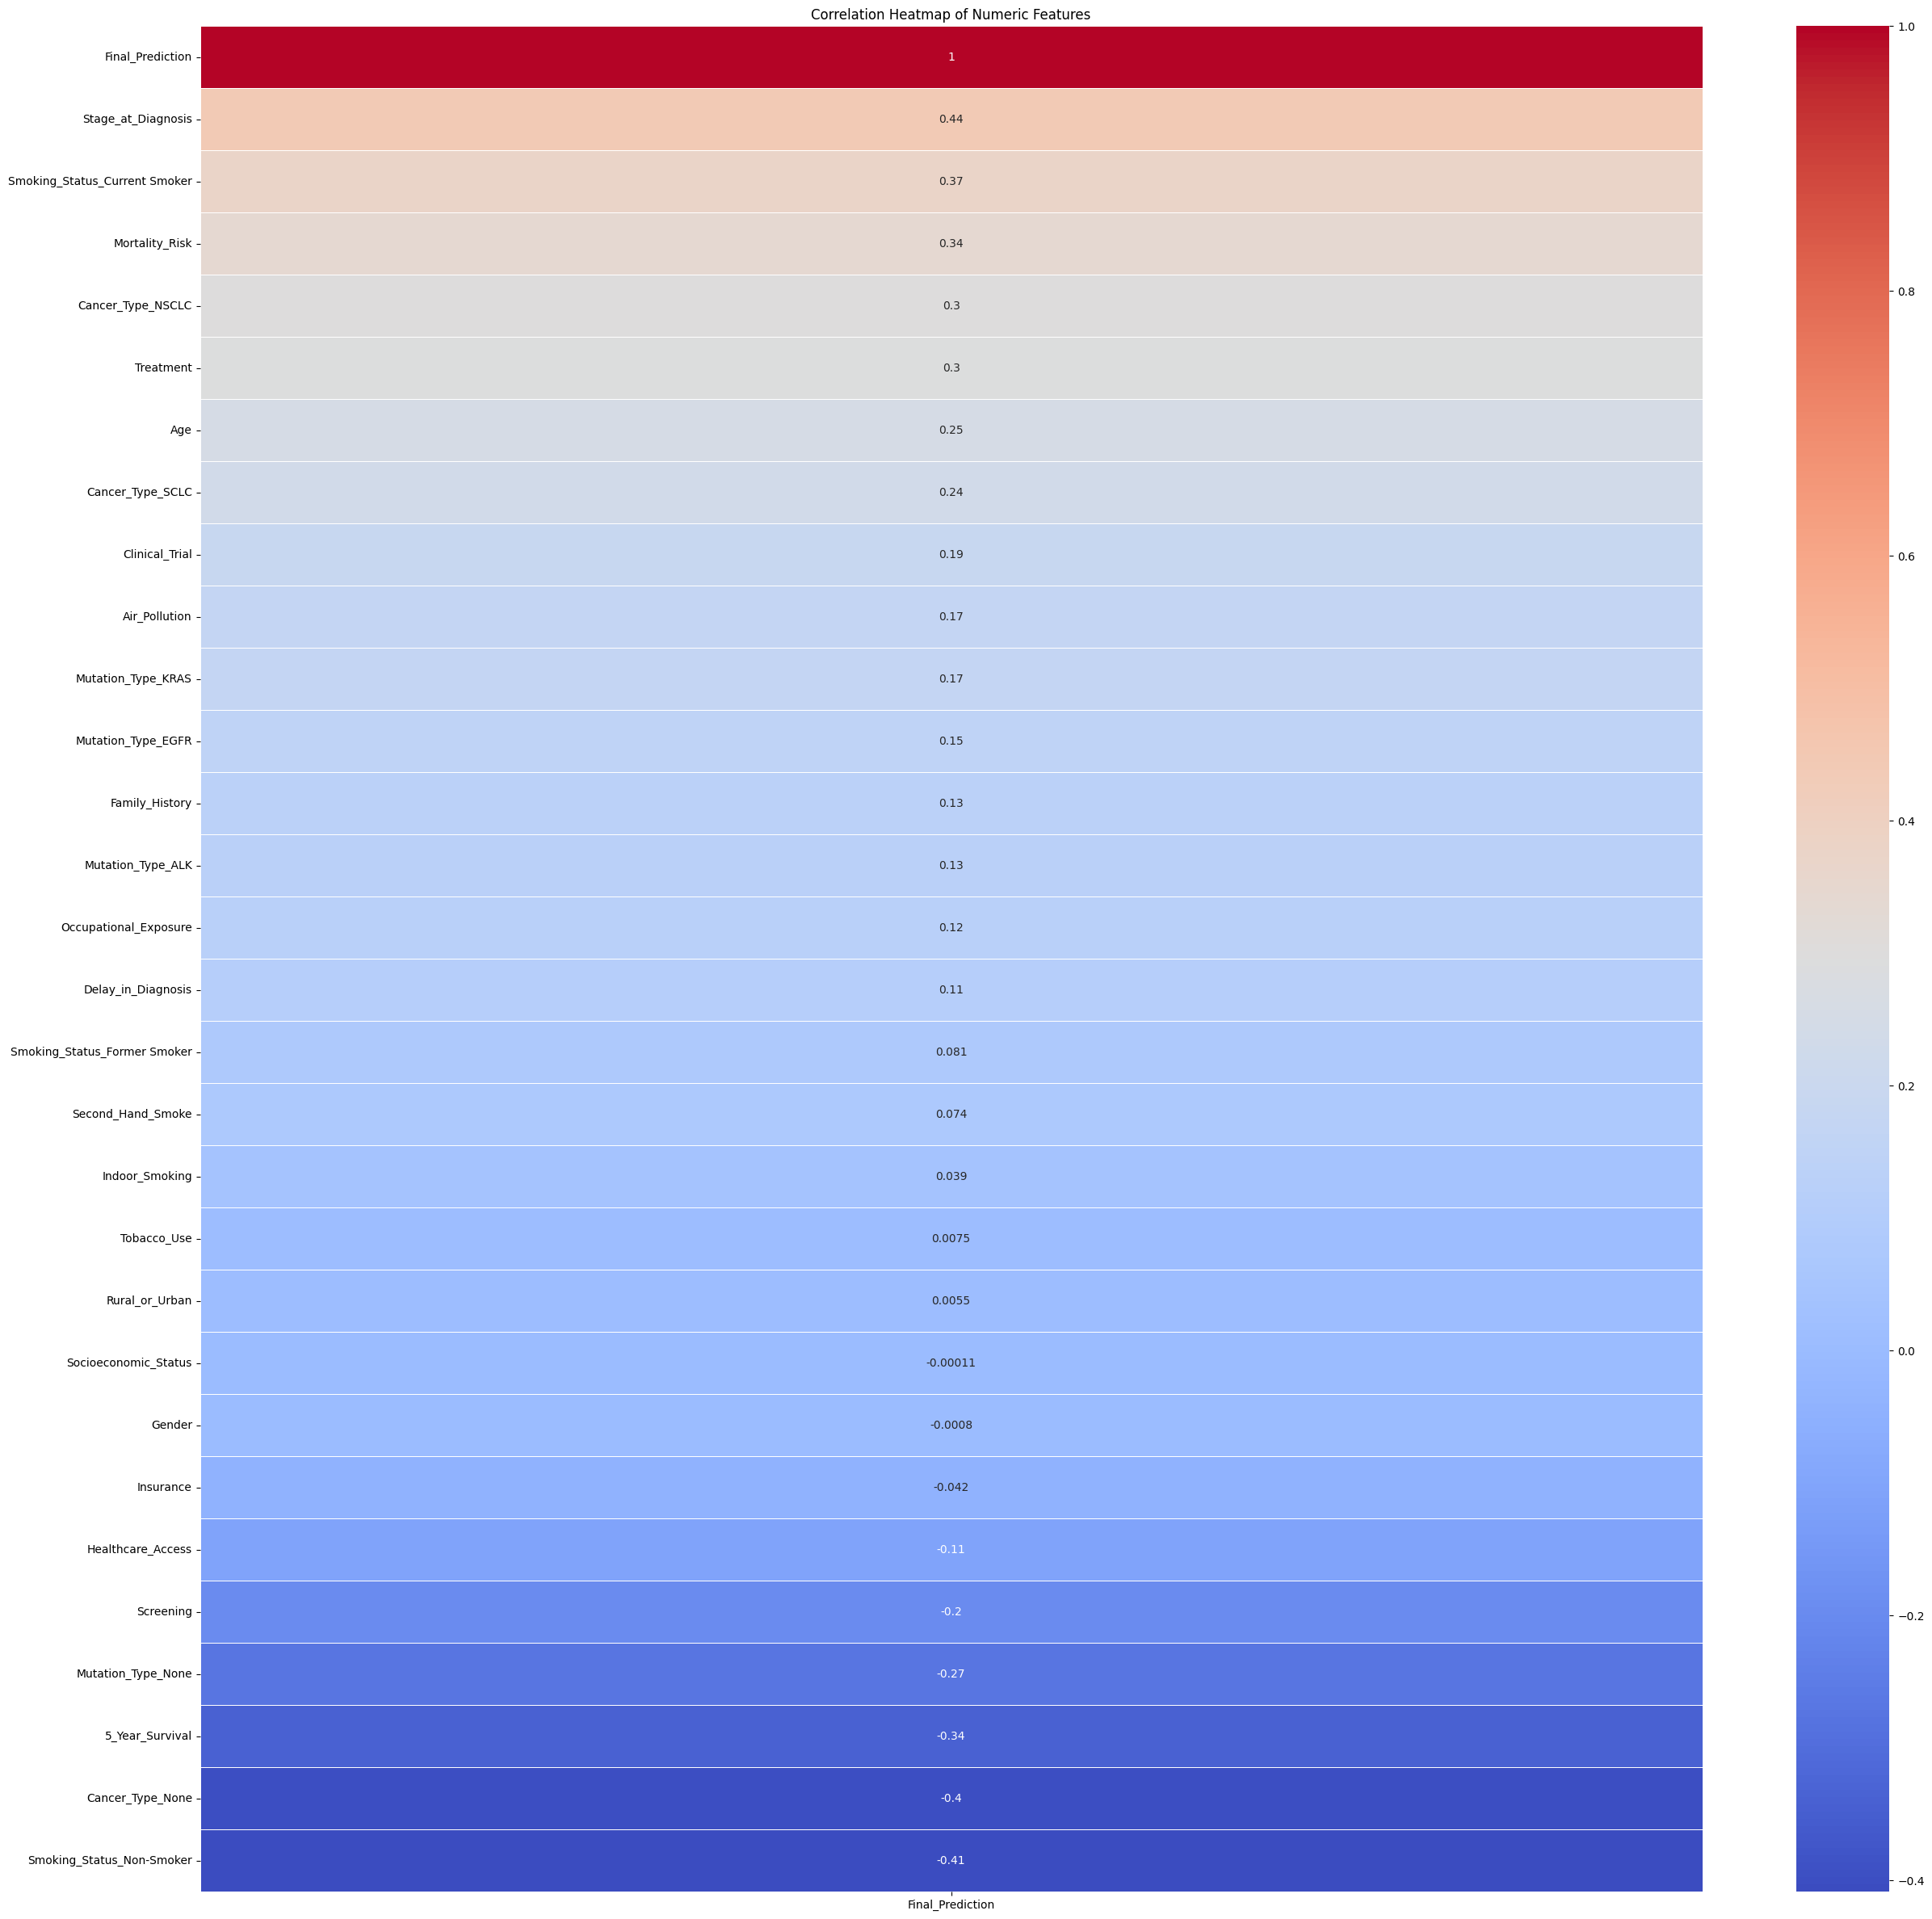

In [137]:
plt.figure(figsize=(30, 30))

corr = data_encoded2[data_encoded2.columns].corr()
corr_with_rating = corr['Final_Prediction'].sort_values(ascending=False).to_frame()

sns.heatmap(corr_with_rating, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

<hr style="border: 2px solid #2AAC92; width: 80%;">
<h1 style="text-align:center; font-family: 'Arial', sans-serif; color : white;">
5 - Models Building
</h1>
<hr style="border: 2px solid #2AAC92; width: 80%;">

In [138]:
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier ,StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,ComplementNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier



## Models & Grid Search Hyperparameters

# Machine Learning Models Used – Description & Hyperparameters

This project evaluates multiple classical and ensemble machine learning models.  
Each model was tuned using GridSearch to optimize performance and ensure fair comparison.

---

## 1. Model Descriptions

### Logistic Regression (LR)
A linear classification model that estimates class probabilities using the logistic (softmax) function.  
Well-suited for linearly separable data and serves as a strong baseline.

---

### Naive Bayes Family
Probabilistic classifiers based on Bayes’ theorem with independence assumptions.

- **GaussianNB**: Assumes features follow a normal distribution (best for continuous features).
- **MultinomialNB**: Designed for count-based features (e.g., term frequencies).
- **ComplementNB**: Improves MultinomialNB performance on imbalanced datasets.
- **BernoulliNB**: Works with binary or boolean features.

---

### K-Nearest Neighbors (KNN)
A distance-based, non-parametric algorithm that classifies a sample based on the majority class of its nearest neighbors.

---

### Decision Tree (DT)
A tree-structured model that splits data using feature thresholds to maximize information gain.  
Highly interpretable but prone to overfitting.

---

### Random Forest (RF)
An ensemble of multiple decision trees trained on bootstrapped samples with feature randomness.  
Reduces overfitting and improves generalization.

---

### Extra Trees (Extremely Randomized Trees)
Similar to Random Forest but uses **randomized split points**, increasing variance reduction and training speed.

---

### XGBoost (Extreme Gradient Boosting)
A high-performance gradient boosting framework that builds trees sequentially to correct previous errors.  
Optimized for speed, regularization, and large-scale data.

---

### LightGBM
A gradient boosting framework optimized for efficiency using **leaf-wise tree growth**.  
Excellent performance on large datasets with low memory usage.

---

## 2. Ensemble Method – Stacking Classifier

### Stacking (Stacked Generalization)
An ensemble technique that:
- Trains multiple **base models**
- Uses their predictions as input features for a **final meta-model**
- Learns how to optimally combine predictions

**Final Model Used:** Random Forest  
This approach improves robustness and overall predictive performance.

---

## 3. Hyperparameter Explanation (Tabular)

### Logistic Regression
| Parameter | Description |
|---------|-------------|
| solver | Optimization algorithm (lbfgs, saga) |
| max_iter | Maximum number of iterations |
| class_weight | Handles class imbalance |
| C | Control regularization (complexity of model) |

---

### Naive Bayes
| Model | Parameter | Description |
|------|----------|-------------|
| GaussianNB | var_smoothing | Numerical stability |
| MultinomialNB | alpha | Laplace smoothing |
| ComplementNB | alpha | Regularization strength |
| BernoulliNB | alpha | Smoothing for binary data |

---

### K-Nearest Neighbors
| Parameter | Description |
|---------|-------------|
| n_neighbors | Number of nearest neighbors |
| metric | Distance calculation method |

---

### Decision Tree
| Parameter | Description |
|---------|-------------|
| max_depth | Limits tree depth |
| class_weight | Handles imbalance |

---

### Random Forest / Extra Trees
| Parameter | Description |
|---------|-------------|
| n_estimators | Number of trees |
| max_depth | Maximum tree depth |
| class_weight | Balances classes |

---

### XGBoost
| Parameter | Description |
|---------|-------------|
| n_estimators | Number of boosting rounds |
| learning_rate | Step size shrinkage |
| max_depth | Tree depth |

---

### LightGBM
| Parameter | Description |
|---------|-------------|
| n_estimators | Number of boosting trees |
| learning_rate | Learning step size |
| num_leaves | Tree complexity |
| max_depth | Depth constraint |

---

## Summary
This combination of linear, probabilistic, distance-based, tree-based, and ensemble models ensures:
- Robust evaluation
- Improved generalization
- Reduced bias and variance through stacking


## Models Preparation

In [139]:
models = [  ('lr', LogisticRegression( solver='lbfgs')),
            ('gnb', GaussianNB()),
            ('mnb',MultinomialNB()),
            ('cnb',ComplementNB()),
            ('bnb',BernoulliNB()),
            ('knn', KNeighborsClassifier(n_neighbors=2)),
            ('rf', RandomForestClassifier(n_estimators=50,random_state=42)),
            ('dt', DecisionTreeClassifier(max_depth=2,random_state=42)),
            ('et' , ExtraTreesClassifier(n_estimators=50,random_state=42)),
            ('lgb' , LGBMClassifier(n_estimators=50,random_state=42)),
            ('xgb' , XGBClassifier(n_estimators=50,random_state=42))

            ]


lr_params = {
    'model': [LogisticRegression()],
    'model__C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
    'model__solver': ['lbfgs', 'saga'],
    'model__max_iter': [100, 500,2000,1000],
    'model__class_weight': ['balanced']
}


gnb_params = {
    'model': [GaussianNB()],
    'model__var_smoothing': [1e-9, 1e-8, 1e-7]
}

mnb_params = {
    'model': [MultinomialNB()],
    'model__alpha': [0.1, 0.5, 1.0],

}

cnb_params = {
    'model': [ComplementNB()],
    'model__alpha': [0.1, 0.5, 1.0],
    'model__norm':  [True,False]
}

bnb_params = {
    'model': [BernoulliNB()],
    'model__alpha': [0.1, 0.5, 1.0],

}

knn_params = {
    'model': [KNeighborsClassifier()],
    'model__n_neighbors': [5,8,10,15],
    'model__metric': ['euclidean', 'manhattan','minkowski', 'chebyshev']
}

rf_params = {
    'model': [RandomForestClassifier(random_state=42)],
    'model__n_estimators': [100,200, 400, 600,800],
    'model__max_depth': [None, 10, 20,30],
    'model__class_weight': ['balanced']
}

dt_params = {
    'model': [DecisionTreeClassifier(random_state=42)],
    'model__max_depth': [None, 10, 20, 30],
    'model__class_weight': ['balanced']
}
et_params = {
    'model__n_estimators': [100,200, 400, 600,800],
    'model__max_depth': [None,10 ,20,30],

}
lgb_params = {
    'model__n_estimators': [100,200, 400, 600,800],
    'model__learning_rate': [0.05, 0.1],
    'model__num_leaves': [31, 63],
    'model__max_depth': [-1, 10,15]
}
xgb_params = {
    'model__n_estimators': [200, 400],
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth': [4, 6,8,10],
}


In [141]:
param_grids = {
     'lr':lr_params,
     'gnb':gnb_params,
    'mnb' :mnb_params,
     'cnb':cnb_params,
     'bnb':bnb_params,
    'knn' :knn_params,
     'rf':rf_params,
     'dt':dt_params,
     'et':et_params,
     'lgb':lgb_params,
     'xgb':xgb_params,

}

In [142]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
  
)
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

## Trainig + Kfold + Grid Search

| Metric        | Meaning                                                                                           |
| ------------- | ------------------------------------------------------------------------------------------------- |
| **precision** | Of all samples predicted as this class, how many were correct. Formula: `TP / (TP + FP)`          |
| **recall**    | Of all actual samples of this class, how many did the model find. Formula: `TP / (TP + FN)`       |
| **f1-score**  | Harmonic mean of precision and recall. Formula: `2 * (precision * recall) / (precision + recall)` |
| **support**   | Number of true samples of that class in the dataset                                               |


# Evaluation Metrics for Classification Problems

Classification models must be evaluated using multiple metrics, because accuracy alone is often misleading. Each metric highlights a different aspect of model behavior.

---

## 1. Accuracy

**Definition:**  
Accuracy measures the proportion of correctly classified samples.

\[
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
\]

**Interpretation:**  
- High accuracy indicates the model predicts well overall.  
- Accuracy is reliable only when classes are balanced.

**Limitations:**  
- Can be misleading in imbalanced datasets.  
- Does not distinguish between types of errors.

**Example Analysis:**  
An accuracy of 83% indicates that the model correctly classifies most cases; however, further metrics are required to assess performance on minority or critical classes.

---

## 2. Precision

**Definition:**  
Precision measures how many predicted positive cases are actually positive.

\[
\text{Precision} = \frac{TP}{TP + FP}
\]

**Interpretation:**  
- High precision means few false positives.  
- Important when false alarms are costly.

**Example Analysis:**  
A precision score of 0.85 suggests that most positive predictions are correct, minimizing false positive classifications.

---

## 3. Recall (Sensitivity)

**Definition:**  
Recall measures how many actual positive cases are correctly identified.

\[
\text{Recall} = \frac{TP}{TP + FN}
\]

**Interpretation:**  
- High recall means few false negatives.  
- Crucial when missing positive cases is dangerous (e.g., medical diagnosis).

**Example Analysis:**  
A recall of 0.80 indicates that the model successfully identifies most positive cases, though some cases are still missed.

---

## 4. F1-Score

**Definition:**  
F1-score is the harmonic mean of precision and recall.

\[
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
\]

**Interpretation:**  
- Balances precision and recall.  
- Best metric when classes are imbalanced.

**Example Analysis:**  
An F1-score of 0.82 demonstrates a good balance between identifying positive cases and limiting false positives.

---

## 5. Confusion Matrix

**Structure:**

|                | Predicted Positive | Predicted Negative |
|----------------|-----------------|-----------------|
| Actual Positive | TP              | FN              |
| Actual Negative | FP              | TN              |

**Interpretation:**  
- Shows exact types of errors  
- Enables detailed error analysis

**Example Analysis:**  
The confusion matrix reveals that false negatives occur more frequently than false positives, indicating that the model is conservative in predicting positive cases.

---

## 6. Combined Interpretation (What Examiners Expect)

A strong analysis links metrics together:  

> Although the model achieved high accuracy, the recall value indicates that some positive cases were missed. The F1-score confirms a balanced trade-off between precision and recall, making the model suitable for real-world deployment where both false positives and false negatives must be controlled.

---

## 7. Metric Selection by Use Case

| Scenario                 | Priority Metric          |
|--------------------------|------------------------|
| Medical diagnosis        | Recall                 |
| Fraud/spam detection          | Precision              |
| Balanced classification  | Accuracy + F1          |
| Imbalanced data          | F1, Recall             |
| Risk assessment          | Confusion Matrix       |

---

## 8. Final Report-Ready Conclusion

To provide a complete evaluation, it is essential to report multiple metrics together. Accuracy alone is insufficient, particularly for imbalanced datasets. Combining precision, recall, F1-score, and the confusion matrix provides a comprehensive understanding of model performance and informs practical deployment decisions.


In [144]:

def eval_model(grid, X_train, y_train, X_val, y_val):
    
    y_pred_train = grid.predict(X_train)
    y_pred_val = grid.predict(X_val)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)
    return acc_train, acc_val


Running GridSearch for lr...
Cross-Validation Scores: [0.85862069 0.86293103 0.84907288 0.8538163  0.86244071]
Mean CV Score: 0.8573763215416872
Std CV Score: 0.005285305030137298
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best params: {'model': LogisticRegression(), 'model__C': 10000, 'model__class_weight': 'balanced', 'model__max_iter': 1000, 'model__solver': 'saga'}
Accuracy: (0.8579805122014315, 0.8543552605109636)
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      3542
           1       0.85      0.86      0.85      3559

    accuracy                           0.85      7101
   macro avg       0.85      0.85      0.85      7101
weighted avg       0.85      0.85      0.85      7101



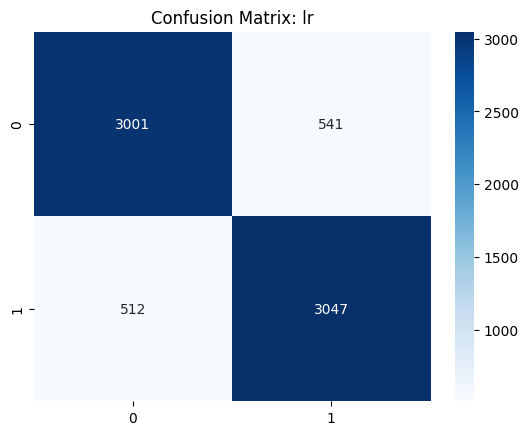


Running GridSearch for gnb...
Cross-Validation Scores: [0.7012931  0.68706897 0.67917206 0.6843467  0.69426477]
Mean CV Score: 0.689229119269602
Std CV Score: 0.00775301566274229
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best params: {'model': GaussianNB(), 'model__var_smoothing': 1e-09}
Accuracy: (0.6889712856773303, 0.6819553409776705)
              precision    recall  f1-score   support

           0       0.61      0.96      0.75      3542
           1       0.90      0.40      0.55      3559

    accuracy                           0.68      7101
   macro avg       0.76      0.68      0.65      7101
weighted avg       0.76      0.68      0.65      7101



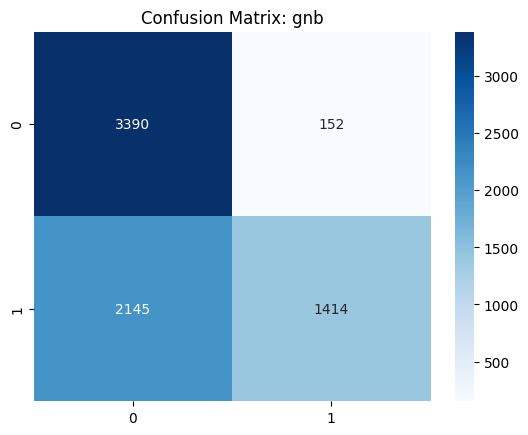


Running GridSearch for mnb...
Cross-Validation Scores: [0.7875     0.76982759 0.75592928 0.76972833 0.78783959]
Mean CV Score: 0.7741649566549196
Std CV Score: 0.012131407219667578
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best params: {'model': MultinomialNB(), 'model__alpha': 0.5}
Accuracy: (0.775028024489092, 0.7650372158519413)
              precision    recall  f1-score   support

           0       0.70      0.89      0.79      3542
           1       0.85      0.63      0.72      3559

    accuracy                           0.76      7101
   macro avg       0.78      0.76      0.76      7101
weighted avg       0.78      0.76      0.76      7101



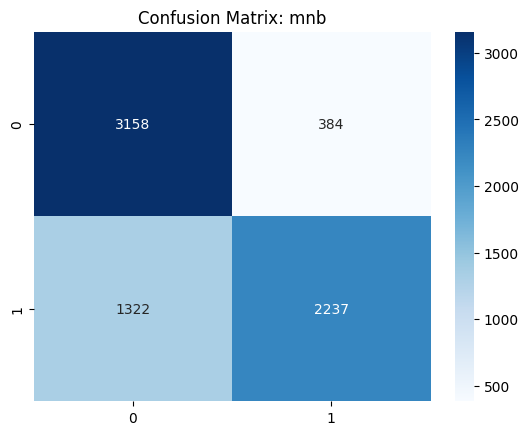


Running GridSearch for cnb...
Cross-Validation Scores: [0.78663793 0.76982759 0.75549806 0.76972833 0.78740837]
Mean CV Score: 0.7738200547203758
Std CV Score: 0.011977626331886315
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best params: {'model': ComplementNB(), 'model__alpha': 0.1, 'model__norm': False}
Accuracy: (0.7747693368974735, 0.7642325487829411)
              precision    recall  f1-score   support

           0       0.70      0.89      0.79      3542
           1       0.85      0.63      0.72      3559

    accuracy                           0.76      7101
   macro avg       0.78      0.76      0.76      7101
weighted avg       0.78      0.76      0.76      7101



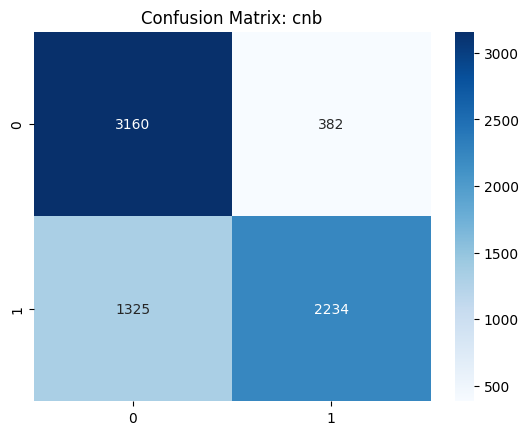


Running GridSearch for bnb...
Cross-Validation Scores: [0.77456897 0.75344828 0.74040535 0.75765416 0.77015955]
Mean CV Score: 0.7592472602637879
Std CV Score: 0.012206691832735215
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best params: {'model': BernoulliNB(), 'model__alpha': 0.1}
Accuracy: (0.7589893938087436, 0.7412995373164353)
              precision    recall  f1-score   support

           0       0.68      0.91      0.78      3542
           1       0.86      0.57      0.69      3559

    accuracy                           0.74      7101
   macro avg       0.77      0.74      0.73      7101
weighted avg       0.77      0.74      0.73      7101



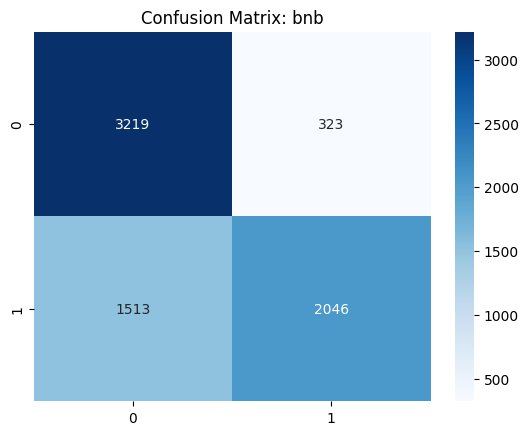


Running GridSearch for knn...
Cross-Validation Scores: [0.77887931 0.75991379 0.76110392 0.7542044  0.77231565]
Mean CV Score: 0.7652834158599872
Std CV Score: 0.008981607171757321
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best params: {'model': KNeighborsClassifier(), 'model__metric': 'manhattan', 'model__n_neighbors': 15}
Accuracy: (0.8528929895662671, 0.8284047475357071)
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      3542
           1       0.85      0.80      0.82      3559

    accuracy                           0.83      7101
   macro avg       0.83      0.83      0.83      7101
weighted avg       0.83      0.83      0.83      7101



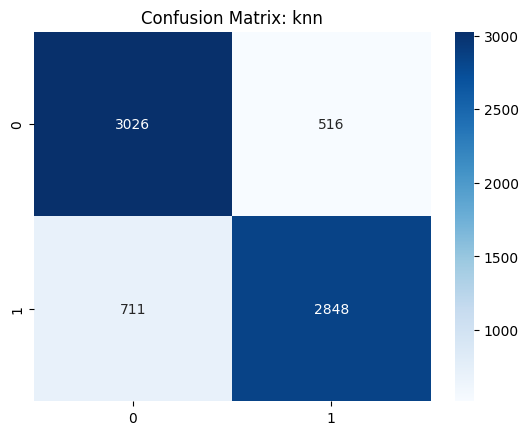


Running GridSearch for rf...
Cross-Validation Scores: [0.84439655 0.8362069  0.82880552 0.83699871 0.83915481]
Mean CV Score: 0.837112496468454
Std CV Score: 0.005041178861165914
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best params: {'model': RandomForestClassifier(random_state=42), 'model__class_weight': 'balanced', 'model__max_depth': 10, 'model__n_estimators': 400}
Accuracy: (0.8795378115029749, 0.8446992556829612)
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      3542
           1       0.85      0.84      0.84      3559

    accuracy                           0.84      7101
   macro avg       0.84      0.84      0.84      7101
weighted avg       0.84      0.84      0.84      7101



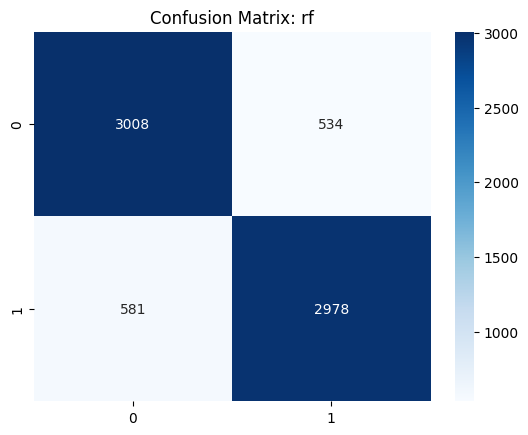


Running GridSearch for dt...
Cross-Validation Scores: [0.79956897 0.79137931 0.72789996 0.78352738 0.8007762 ]
Mean CV Score: 0.7806303623737937
Std CV Score: 0.027088571756263405
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best params: {'model': DecisionTreeClassifier(random_state=42), 'model__class_weight': 'balanced', 'model__max_depth': 10}
Accuracy: (0.8918685867034578, 0.816133574733454)
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      3542
           1       0.82      0.80      0.81      3559

    accuracy                           0.81      7101
   macro avg       0.81      0.81      0.81      7101
weighted avg       0.81      0.81      0.81      7101



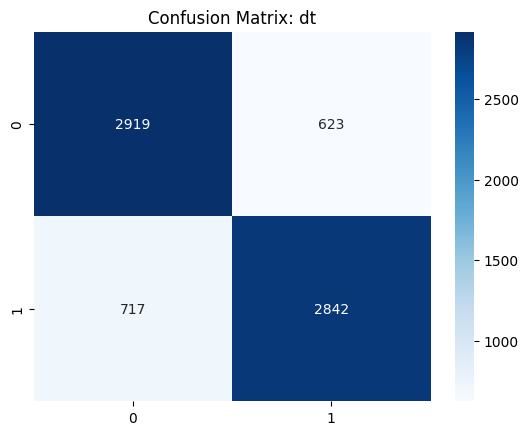


Running GridSearch for et...
Cross-Validation Scores: [0.83663793 0.82974138 0.81673135 0.83182406 0.83354894]
Mean CV Score: 0.8296967331340799
Std CV Score: 0.006865106582534183
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best params: {'model__max_depth': 10, 'model__n_estimators': 200}
Accuracy: (0.8637578684142451, 0.8342385837859586)
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      3542
           1       0.85      0.83      0.84      3559

    accuracy                           0.84      7101
   macro avg       0.84      0.84      0.84      7101
weighted avg       0.84      0.84      0.84      7101



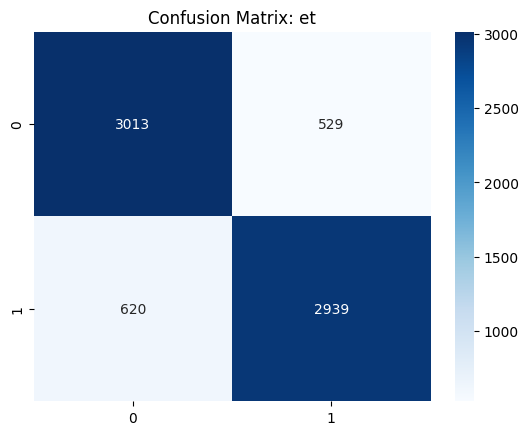


Running GridSearch for lgb...
Cross-Validation Scores: [0.85732759 0.86034483 0.84174213 0.85122898 0.8581285 ]
Mean CV Score: 0.8537544051389571
Std CV Score: 0.006723192093262496
Fitting 5 folds for each of 60 candidates, totalling 300 fits
[LightGBM] [Info] Number of positive: 5811, number of negative: 5786
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 11597, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501078 -> initscore=0.004311
[LightGBM] [Info] Start training from score 0.004311


c:\Users\alash\OneDrive\Desktop\ML\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

c:\Users\alash\OneDrive\Desktop\ML\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

c:\Users\alash\OneDrive\Desktop\ML\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



Best params: {'model__learning_rate': 0.05, 'model__max_depth': -1, 'model__n_estimators': 100, 'model__num_leaves': 31}
Accuracy: (0.8713460377683884, 0.8495272580969624)
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      3542
           1       0.84      0.85      0.85      3559

    accuracy                           0.85      7101
   macro avg       0.85      0.85      0.85      7101
weighted avg       0.85      0.85      0.85      7101



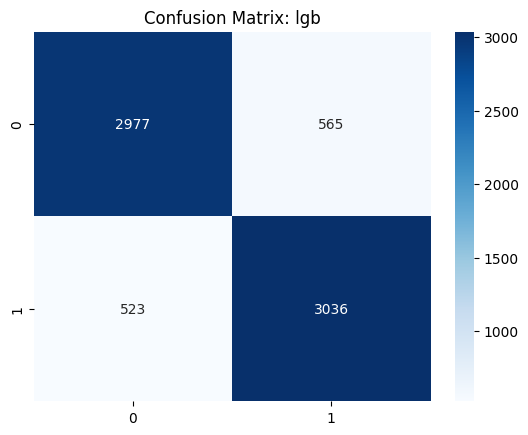


Running GridSearch for xgb...
Cross-Validation Scores: [0.85560345 0.85474138 0.83398016 0.84131091 0.85209142]
Mean CV Score: 0.84754546400797
Std CV Score: 0.008488404384092296
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best params: {'model__learning_rate': 0.05, 'model__max_depth': 4, 'model__n_estimators': 200}
Accuracy: (0.8685004742605846, 0.8531482599074632)
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      3542
           1       0.85      0.85      0.85      3559

    accuracy                           0.85      7101
   macro avg       0.85      0.85      0.85      7101
weighted avg       0.85      0.85      0.85      7101



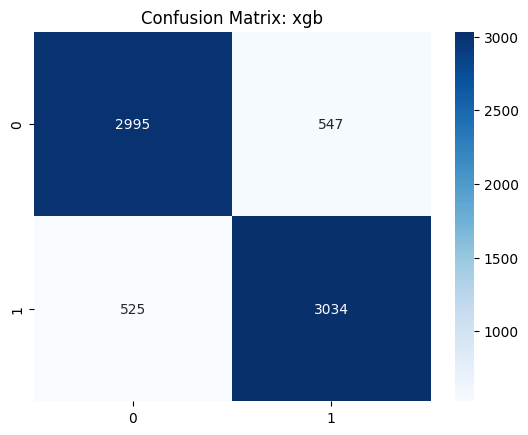

All models processed.


In [145]:
model_accuracies = []
best_params = []
trained_models=[]
for name, model in models:

    print(f"\nRunning GridSearch for {name}...")



    if name in ['mnb', 'cnb', 'bnb']:
       scaler = MinMaxScaler()
    else:
       scaler = StandardScaler()

    pipeline = Pipeline([
      ('scaler', scaler),
      ('model', model)
           ])
    

    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grids[name],
        scoring='accuracy',
        cv=5,
        n_jobs=-1,
        verbose=1
    )
    cv_scores = cross_val_score(
       pipeline,
       X_train,
       y_train,
       cv=5,
       scoring='accuracy',
       n_jobs=-1       # parallel execution

    )
    print("Cross-Validation Scores:", cv_scores)
    print("Mean CV Score:", np.mean(cv_scores))
    print("Std CV Score:", np.std(cv_scores))

    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    

    y_pred = best_model.predict(X_test)

    accuracy_tra,accuracy_val = eval_model(best_model, X_train, y_train, X_val, y_val)
    trained_models.append((name,best_model))
    model_accuracies.append((name, (accuracy_tra,accuracy_val)))
    best_params.append((name, grid.best_params_))

    print("Best params:", grid.best_params_)
    print("Accuracy:", (accuracy_tra,accuracy_val))
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.show()

print("All models processed.")


## Default HyperParameterized Models

In [156]:
model_default_accuracies = []

for name, model in models:

    print(f"\nRunning Fitting for {name}...")



    if name in ['mnb', 'cnb', 'bnb']:
       scaler = MinMaxScaler()
    else:
       scaler = StandardScaler()

    pipeline = Pipeline([
      ('scaler', scaler),
      ('model', model)
           ])
    

    
    
    
    pipeline.fit(X_train, y_train)
    y_pred=pipeline.predict(X_test)

    accuracy_tra2,accuracy_val2 = eval_model(pipeline,X_train,y_train,X_val,y_val)
    model_default_accuracies.append((name, (accuracy_tra2,accuracy_val2)))
   

    print(Pipeline.get_params(pipeline))
    print("Accuracy:", (accuracy_tra2,accuracy_val2))
print("All models processed.")



Running Fitting for lr...
{'memory': None, 'steps': [('scaler', StandardScaler()), ('model', LogisticRegression())], 'transform_input': None, 'verbose': False, 'scaler': StandardScaler(), 'model': LogisticRegression(), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'model__C': 1.0, 'model__class_weight': None, 'model__dual': False, 'model__fit_intercept': True, 'model__intercept_scaling': 1, 'model__l1_ratio': 0.0, 'model__max_iter': 100, 'model__n_jobs': None, 'model__penalty': 'deprecated', 'model__random_state': None, 'model__solver': 'lbfgs', 'model__tol': 0.0001, 'model__verbose': 0, 'model__warm_start': False}
Accuracy: (0.8578942830042252, 0.8541540937437135)

Running Fitting for gnb...
{'memory': None, 'steps': [('scaler', StandardScaler()), ('model', GaussianNB())], 'transform_input': None, 'verbose': False, 'scaler': StandardScaler(), 'model': GaussianNB(), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'model__priors':

c:\Users\alash\OneDrive\Desktop\ML\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

c:\Users\alash\OneDrive\Desktop\ML\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

c:\Users\alash\OneDrive\Desktop\ML\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



{'memory': None, 'steps': [('scaler', StandardScaler()), ('model', LGBMClassifier(n_estimators=50, random_state=42))], 'transform_input': None, 'verbose': False, 'scaler': StandardScaler(), 'model': LGBMClassifier(n_estimators=50, random_state=42), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'model__boosting_type': 'gbdt', 'model__class_weight': None, 'model__colsample_bytree': 1.0, 'model__importance_type': 'split', 'model__learning_rate': 0.1, 'model__max_depth': -1, 'model__min_child_samples': 20, 'model__min_child_weight': 0.001, 'model__min_split_gain': 0.0, 'model__n_estimators': 50, 'model__n_jobs': None, 'model__num_leaves': 31, 'model__objective': None, 'model__random_state': 42, 'model__reg_alpha': 0.0, 'model__reg_lambda': 0.0, 'model__subsample': 1.0, 'model__subsample_for_bin': 200000, 'model__subsample_freq': 0}
Accuracy: (0.8712598085711822, 0.8479179239589619)

Running Fitting for xgb...
{'memory': None, 'steps': [('scaler', StandardScaler

## Saving Models & Workspace Data

In [157]:
import pickle

for name, model in trained_models:

  with open(f'..\\Ml_final_Project\\models\\{name}.pkl', 'wb') as f:
         pickle.dump(model, f)
         #print(model)


In [158]:

   
with open('..\\Ml_final_Project\\workspace\\features.txt','w') as f:
    f.write('\n'.join(data_clean.columns))

In [159]:
with open('..\\Ml_final_Project\\workspace\\features.txt','r') as f:
    print(f.read())

Age
Gender
Smoking_Status
Second_Hand_Smoke
Air_Pollution
Occupational_Exposure
Rural_or_Urban
Socioeconomic_Status
Healthcare_Access
Insurance
Indoor_Smoking
Tobacco_Use
Family_History
Screening
Stage_at_Diagnosis
Cancer_Type
Mutation_Type
Treatment
Clinical_Trial
Delay_in_Diagnosis
Mortality_Risk
5_Year_Survival
Final_Prediction


In [160]:
import joblib
joblib.dump(oe, '..\\Ml_final_Project\\workspace\\ordinal_encoder.pkl')
joblib.dump(binary_encoders, "..\\Ml_final_Project\\workspace\\label_encoder.pkl")



['..\\Ml_final_Project\\workspace\\label_encoder.pkl']

In [161]:
data_encoded3=data_encoded2.drop(columns='Final_Prediction')
joblib.dump(data_encoded3.columns, '..\\Ml_final_Project\\workspace\\columns.pkl')
print(data_encoded3.columns)

Index(['Age', 'Gender', 'Second_Hand_Smoke', 'Air_Pollution',
       'Occupational_Exposure', 'Rural_or_Urban', 'Socioeconomic_Status',
       'Healthcare_Access', 'Insurance', 'Indoor_Smoking', 'Tobacco_Use',
       'Family_History', 'Screening', 'Stage_at_Diagnosis', 'Treatment',
       'Clinical_Trial', 'Delay_in_Diagnosis', 'Mortality_Risk',
       '5_Year_Survival', 'Smoking_Status_Current Smoker',
       'Smoking_Status_Former Smoker', 'Smoking_Status_Non-Smoker',
       'Cancer_Type_NSCLC', 'Cancer_Type_None', 'Cancer_Type_SCLC',
       'Mutation_Type_ALK', 'Mutation_Type_EGFR', 'Mutation_Type_KRAS',
       'Mutation_Type_None'],
      dtype='object')


In [162]:
print(trained_models[0])

('lr', Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(C=10000, class_weight='balanced',
                                    max_iter=1000, solver='saga'))]))


<hr style="border: 2px solid #2AAC92; width: 80%;">
<h1 style="text-align:center; font-family: 'Arial', sans-serif; color : white;">
6 - Models Evaluation & Selection
</h1>
<hr style="border: 2px solid #2AAC92; width: 80%;">

## Evaluation (Metric=Accuracy)

   Model  Accuracy(t)  Accuracy(v)  Default_Accuracy(t)  Default_Accuracy(v)
7     dt     0.891869     0.816134             0.789170             0.781935
6     rf     0.879538     0.844699             0.998793             0.836250
9    lgb     0.871346     0.849527             0.871260             0.847918
10   xgb     0.868500     0.853148             0.907045             0.843895
8     et     0.863758     0.834239             0.999138             0.828002
0     lr     0.857981     0.854355             0.857894             0.854154
5    knn     0.852893     0.828405             0.885401             0.756186
2    mnb     0.775028     0.765037             0.774942             0.765037
3    cnb     0.774769     0.764233             0.774769             0.764233
4    bnb     0.758989     0.741300             0.758817             0.741702
1    gnb     0.688971     0.681955             0.688971             0.681955


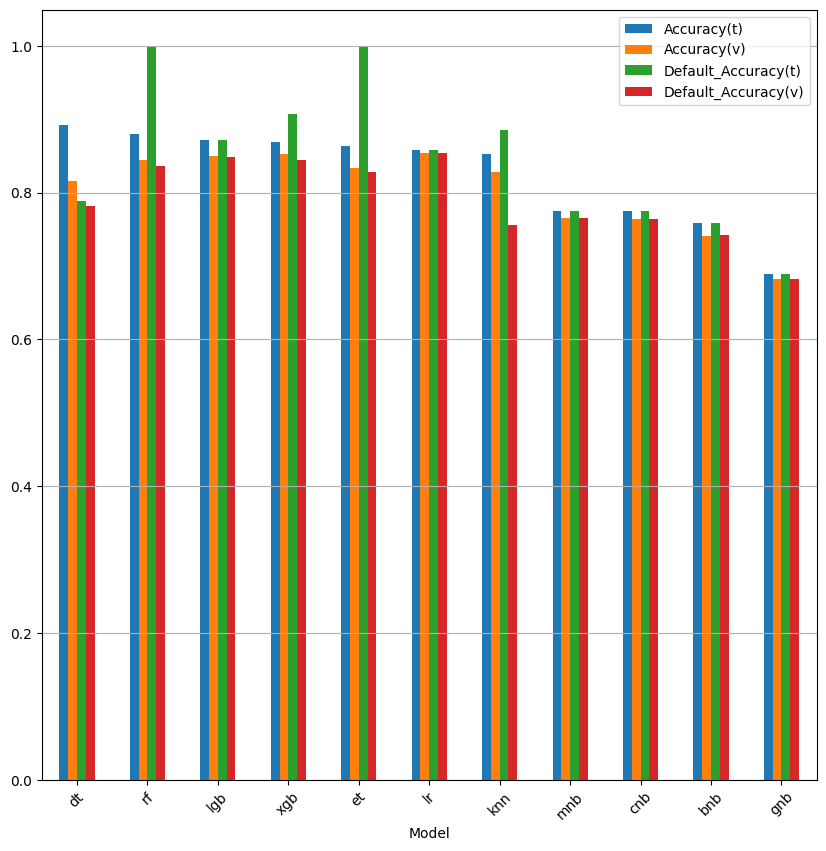

In [163]:
results=[]

i=0
for name,acc in model_accuracies:
    results.append((name,acc[0],acc[1],model_default_accuracies[i][1][0],model_default_accuracies[i][1][1]))
    i+=1

results = pd.DataFrame(results)
results.columns=['Model','Accuracy(t)','Accuracy(v)',"Default_Accuracy(t)",'Default_Accuracy(v)']
results.sort_values(by='Accuracy(t)',ascending=False,inplace=True)
print (results)
results.plot.bar(x='Model', y=['Accuracy(t)',"Accuracy(v)",'Default_Accuracy(t)','Default_Accuracy(v)'], figsize=(10, 10))
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Feature Importance

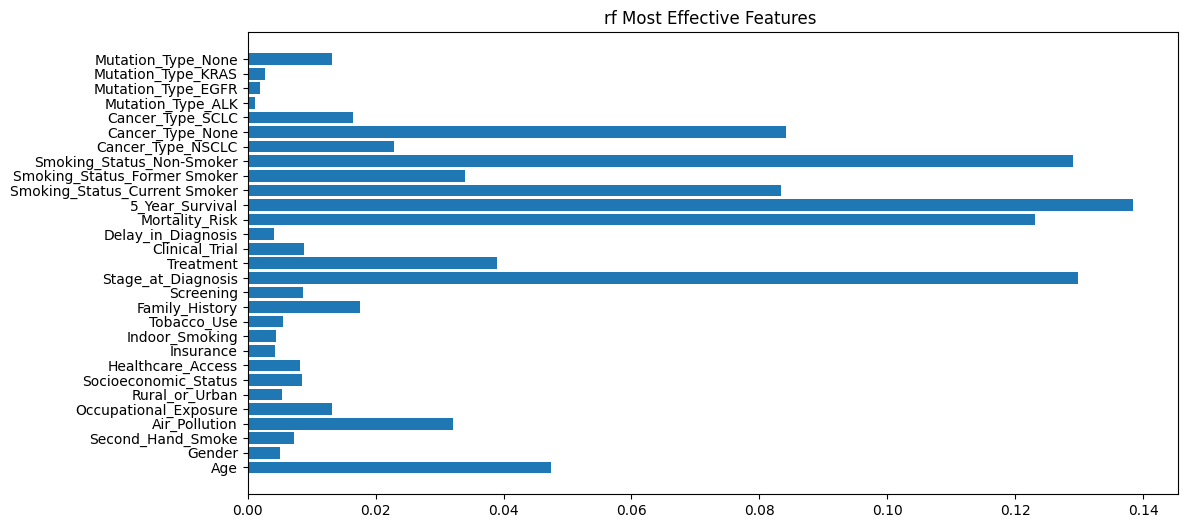

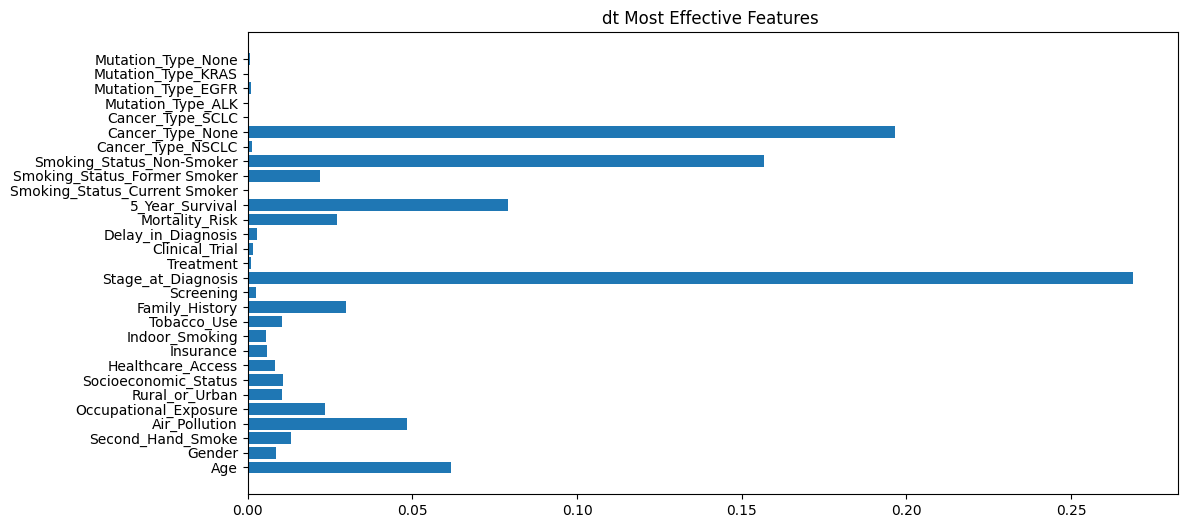

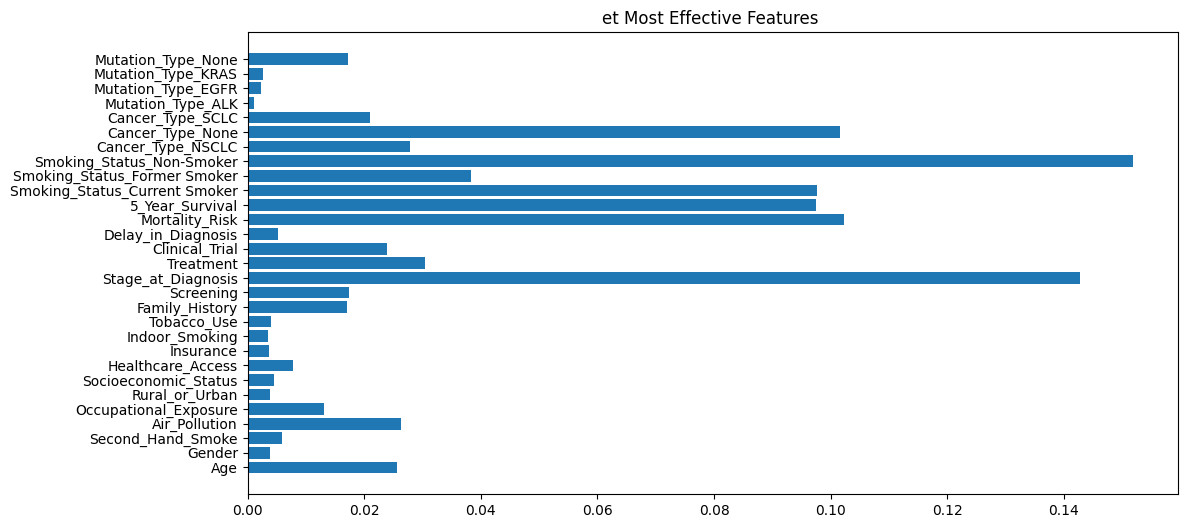

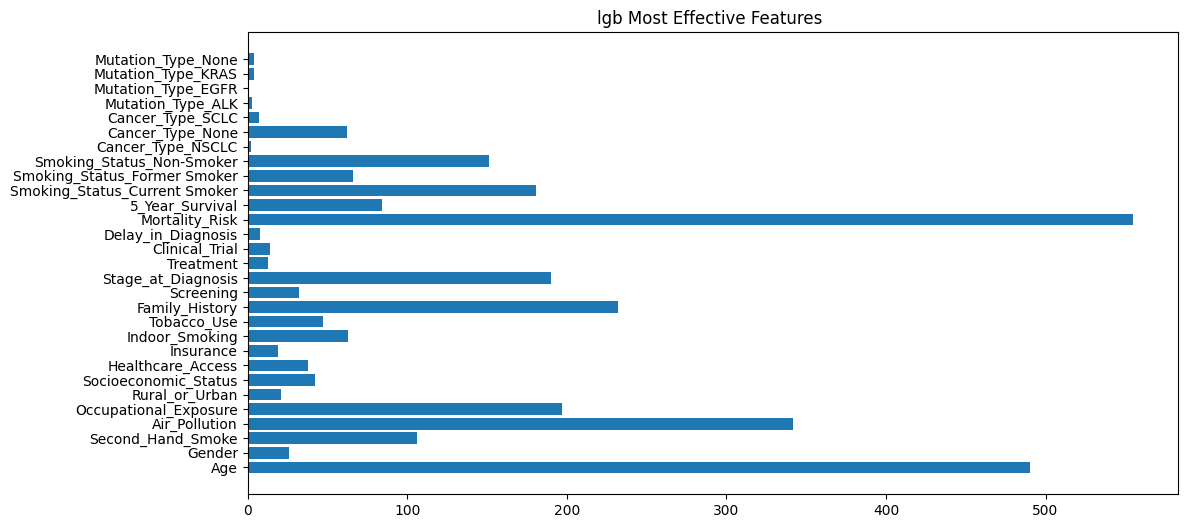

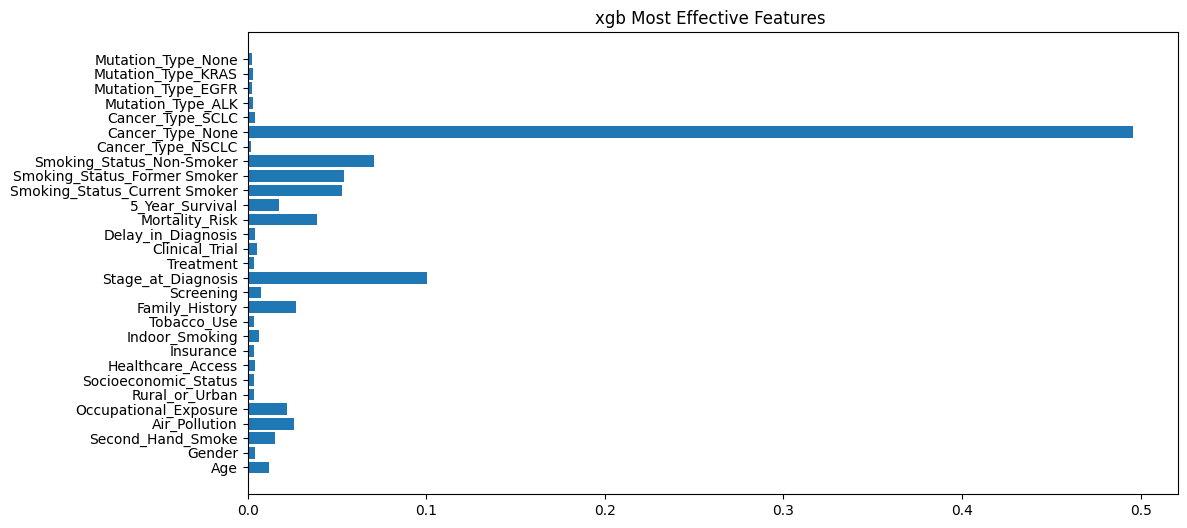

In [164]:
for name,model in trained_models:
 if name in ['dt','rf','lgb','et','xgb']  : 
  modell = model.named_steps['model']
  importances = modell.feature_importances_
  features = X_train.columns
  plt.figure(figsize=(12,6))
  plt.barh(features, importances)
  plt.title(f"{name} Most Effective Features ")# most effective feature on producing output
  plt.show()



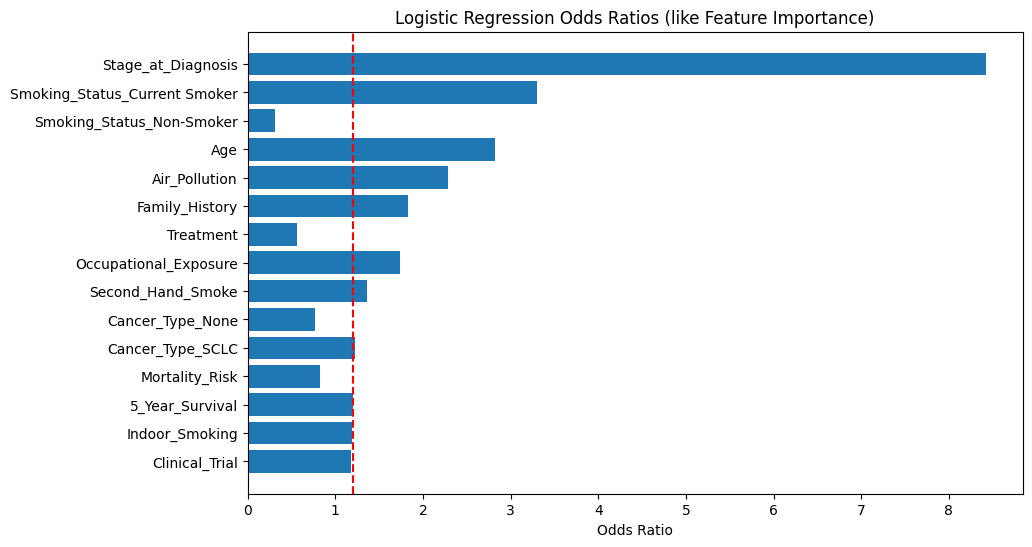

In [165]:
lr=trained_models[0][1].named_steps['model']
coefficients = lr.coef_[0]
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": coefficients,
    "Abs_Coefficient": np.abs(coefficients)
})

coef_df = coef_df.sort_values("Abs_Coefficient", ascending=False)

coef_df["Odds_Ratio"] = np.exp(coef_df["Coefficient"])
plt.figure(figsize=(10, 6))
plt.barh(coef_df["Feature"][:15], coef_df["Odds_Ratio"][:15])
plt.axvline(1.2, color='red', linestyle='--') #set red line
plt.xlabel("Odds Ratio")
plt.title("Logistic Regression Odds Ratios (like Feature Importance)")
plt.gca().invert_yaxis()#Highest-ranked feature appears at the top
plt.show()


## Best HyperParameters

In [166]:
for model,params in best_params:
    print(f'Model: --> {model}')
    print(f"best_parameters: {params}\n")
    print('---------------\n')

Model: --> lr
best_parameters: {'model': LogisticRegression(), 'model__C': 10000, 'model__class_weight': 'balanced', 'model__max_iter': 1000, 'model__solver': 'saga'}

---------------

Model: --> gnb
best_parameters: {'model': GaussianNB(), 'model__var_smoothing': 1e-09}

---------------

Model: --> mnb
best_parameters: {'model': MultinomialNB(), 'model__alpha': 0.5}

---------------

Model: --> cnb
best_parameters: {'model': ComplementNB(), 'model__alpha': 0.1, 'model__norm': False}

---------------

Model: --> bnb
best_parameters: {'model': BernoulliNB(), 'model__alpha': 0.1}

---------------

Model: --> knn
best_parameters: {'model': KNeighborsClassifier(), 'model__metric': 'manhattan', 'model__n_neighbors': 15}

---------------

Model: --> rf
best_parameters: {'model': RandomForestClassifier(random_state=42), 'model__class_weight': 'balanced', 'model__max_depth': 10, 'model__n_estimators': 400}

---------------

Model: --> dt
best_parameters: {'model': DecisionTreeClassifier(random

## Final Comparison and Analysis 

Observations:

* `Logistic Regression` typically achieves the highest Accuracy due to its ability to capture linear interactions.

* `Naive Bias` Model provides Less  performance Than Others.

 
## Conclusion 

This project demonstrates:

* Proper hyperparameter tuning using GridSearchCV

* Strong understanding of bias–variance trade-off

* Clean model evaluation and comparison

* Professional ML pipeline design suitable for real-world deployment

<hr style="border: 2px solid #2AAC92; width: 80%;">
<h1 style="text-align:center; font-family: 'Arial', sans-serif; color : white;">
7 - Deployment
</h1>
<hr style="border: 2px solid #2AAC92; width: 80%;">

`in terminal run -->` 
* cd .\Ml_final_Project
* streamlit run .app.py